# Proyecto final



**Estudiante:** [Luis Alfredo Denis Garcia]

## Introducción




1.  **Definición de Objetivos:** Saber que locales y productos tienen mayor rentavilidad o movimiento.
    Preguntas específicas:
¿Cuáles son los 5 productos más vendidos?
¿Cuáles son las categorias de productos más vendidos?
¿Cuáles son las categorias de  productos que generan más ingresos?
¿Cuáles son las categorias de productos más rentables?
¿Cuáles son las categorias de productos menos rentables?
¿Cuáles son los  países con mayor volumen de ventas?
¿Cuáles son los  países con mayor volumen de ventas?
¿Cuáles son los  estados con mayor volumen de ventas?
¿Cómo han evolucionado las ventas totales a lo largo del tiempo (tendencia anual, mensual)?

2.  **Recopilación de Datos:** Obtener el conjunto de datos de una fuente confiable.
3.  **Importar Librerías:** Cargar las librerías necesarias para el análisis (como `pandas`, `numpy`, `matplotlib`, `seaborn`, `scipy`).
4.  **Carga de Datos:** Leer el conjunto de datos en un DataFrame (generalmente usando `pandas`).
5.  **Inspección Inicial:**
    -   Mostrar las primeras filas (`.head()`).
    -   Ver información general del DataFrame (`.info()`).
    -   Obtener estadísticas descriptivas (`.describe()`).
6.  **Limpieza de Datos:**
    -   Identificar y manejar valores faltantes.
    -   Detectar y tratar datos atípicos (outliers).
    -   Corregir o eliminar datos erróneos o inconsistentes.
    -   Convertir tipos de datos si es necesario.
7.  **Análisis Univariado:** Examinar cada variable individualmente.
    -   Estadísticas descriptivas.
    -   Visualizaciones (histogramas, diagramas de caja, gráficos de barras, etc.).
    -   Medidas de Tendencia Central y Dispersión.
    -   Análisis de Curtosis y Asimetría.
8.  **Análisis Bivariado:** Explorar las relaciones entre pares de variables.
    -   Diagramas de dispersión, correlación, boxplots, tablas de contingencia, etc.
9. **Analisis multivariado**.
10. **Extracción de Conclusiones:** Resumir los hallazgos y responder a las preguntas planteadas inicialmente.
11. **Comunicación de Resultados:** Presentar los resultados de forma clara y concisa, utilizando visualizaciones y explicaciones adecuadas.


## 1. Importar las librerías necesarias

Importa aquí las librerías que utilizarás. Recuerda que además de las principales para EDA, para los nuevos analisis usaremos:

-   **`pandas`:** Para la manipulación y análisis de datos.
-   **`numpy`:** Para operaciones numéricas.
-   **`matplotlib.pyplot`:** Para la creación de gráficos.
-   **`seaborn`:** Para visualizaciones estadísticas más atractivas y complejas.
-   **`scipy.stats`:** Para análisis estadísticos, incluyendo curtosis, asimetría, y funciones de probabilidad.

Si necesitas librerías adicionales, puedes importarlas también.

In [1]:
# -- Importamos las librerias --
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
import empiricaldist
import janitor
import scipy.stats
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import session_info
import warnings
warnings.filterwarnings('ignore')

## 2. Carga y descripción general del conjunto de datos

**2.1 Carga del conjunto de datos:**

- Utiliza `pandas` para cargar tu conjunto de datos en un DataFrame. 
- Asegurate de especificar correctamente la ruta del archivo. Puedes usar archivos CSV, Excel, JSON, u otros formatos soportados por `pandas`.

**2.2 Inspección Inicial:**

-   Muestra las primeras filas del DataFrame usando `.head()` para tener una idea general de su estructura.
-   Utiliza `.info()` para obtener un resumen de las columnas, tipos de datos y valores no nulos.
-   Utiliza `.describe()` para obtener estadísticas descriptivas de las variables numéricas.

## 3. Limpieza de datos

En este paso, aborda los problemas identificados en la inspección inicial. Las acciones comunes incluyen:

**3.1 Manejo de Valores Faltantes:**
Decidi rellenar los valores nulos de la columna  Delivery Date con la fecha del pedido Order Date, para
no eliminar ninguna fila y perder informacion valiosa.

Tambien en la columna Square Meters algunas sucursales no tienen datos sobre su tamaño. Podrían ser sucursales online o datos faltantes. Asi que decidi rellenar valores nulos con la media de las sucursales físicas.



In [2]:
# -- primero realizo la carga de stores, luego una inspeccion inicial--
stores = pd.read_csv('D:\global electronic\stores.csv')
stores.head()
stores.info()
stores.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


,StoreKey,Square Meters
count,67.000000,66.000000
mean,33.000000,1402.196970
std,19.485037,576.404058
min,0.000000,245.000000
25%,16.500000,1108.750000
50%,33.000000,1347.500000
75%,49.500000,2000.000000
max,66.000000,2105.000000


In [3]:
stores.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [4]:
#analizar los formatos de fechas
stores["Open Date control"]= stores["Open Date"].astype(str)
#formato detectado
fecha_stores= stores["Open Date control"].str.replace(r'\d', 'X', regex=True).value_counts()
print(fecha_stores)

Open Date control
X/X/XXXX      55
XX/XX/XXXX     8
X/XX/XXXX      2
XX/X/XXXX      2
Name: count, dtype: int64


In [5]:
# empezamos a convertir fechas con diferentes formatos
stores['Open Date'] = pd.to_datetime(stores['Open Date control'], format='%m/%d/%Y', errors='coerce')

# Identificar los valores que quedan como na
errores_stores = stores['Open Date'].isna()

# Intentar convertir esos errores asumiendo formato D/M/YYYY
stores.loc[errores_stores, 'Open Date'] = pd.to_datetime(stores.loc[errores_stores, 'Open Date control'], format='%d/%m/%Y', errors='coerce')


In [6]:
print(stores[["StoreKey", "Open Date"]])

    StoreKey  Open Date
0          1 2008-01-01
1          2 2008-01-12
2          3 2012-01-07
3          4 2010-01-01
4          5 2015-12-09
..       ...        ...
62        63 2008-03-06
63        64 2010-01-01
64        65 2012-01-01
65        66 2014-01-01
66         0 2010-01-01

[67 rows x 2 columns]


In [7]:
#estandarizamos los nombres de las columnas con 
stores.columns = stores.columns.str.strip().str.lower().str.replace(" ", "_")

In [8]:
print(stores.columns)

Index(['storekey', 'country', 'state', 'square_meters', 'open_date',
       'open_date_control'],
      dtype='object')


In [9]:
Products = pd.read_csv('D:\global electronic\Products.csv')
Products.head()
Products.info()
Products.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


,ProductKey,SubcategoryKey,CategoryKey
count,2517.000000,2517.000000,2517.000000
mean,1259.000000,491.810091,4.878824
std,726.739637,229.887134,2.299170
min,1.000000,101.000000,1.000000
25%,630.000000,305.000000,3.000000
50%,1259.000000,406.000000,4.000000
75%,1888.000000,801.000000,8.000000
max,2517.000000,808.000000,8.000000


In [10]:
# Convertir ProductKey a numérico
Products['ProductKey'] = pd.to_numeric(Products['ProductKey'], errors='coerce')

# Convertir Unit Cost USD y Unit Price USD a numérico y eliminamos simbolo de usd
Products['Unit Cost USD'] = pd.to_numeric(Products['Unit Cost USD'].replace('[\$,]', '', regex=True), errors='coerce')
Products['Unit Price USD'] = pd.to_numeric(Products['Unit Price USD'].replace('[\$,]', '', regex=True), errors='coerce')

Products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB


In [11]:
Products.columns = Products.columns.str.strip().str.lower().str.replace(" ", "_")
print(Products.columns)

Index(['productkey', 'product_name', 'brand', 'color', 'unit_cost_usd',
       'unit_price_usd', 'subcategorykey', 'subcategory', 'categorykey',
       'category'],
      dtype='object')


In [12]:
exchange = pd.read_csv('D:\global electronic\Exchange_Rates.csv')
exchange.head()
exchange.info()
exchange.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


,Exchange
count,11215.000000
mean,1.061682
std,0.245519
min,0.628500
25%,0.857800
50%,1.000000
75%,1.311900
max,1.725300


In [13]:
#analizar los formatos de fechas
exchange["Date control"]= exchange["Date"].astype(str)
#formato detectado
fecha_exchange= exchange["Date control"].str.replace(r'\d', 'X', regex=True).value_counts()
print(fecha_exchange)

Date control
X/XX/XXXX     5935
X/X/XXXX      2520
XX/XX/XXXX    1950
XX/X/XXXX      810
Name: count, dtype: int64


In [14]:
# empezamos a convertir fechas con diferentes formatos
exchange['Date'] = pd.to_datetime(exchange['Date control'], format='%m/%d/%Y', errors='coerce')

# Identificar los valores que quedan como na
errores_exchange = exchange['Date'].isna()

# Intentar convertir esos errores asumiendo formato D/M/YYYY
exchange.loc[errores_exchange, 'Date'] = pd.to_datetime(exchange.loc[errores_exchange, 'Date control'], format='%d/%m/%Y', errors='coerce')

In [15]:
#para cambiar el nombre de la columna currency a curency code para poder unir con otro dataset
exchange.rename(columns={'date': 'order_date', 'currency': 'currency_code'}, inplace=True)

In [16]:
#estandarizamos los nombres de las columnas con 
exchange.columns = exchange.columns.str.strip().str.lower().str.replace(" ", "_")
print(exchange.columns)

Index(['date', 'currency', 'exchange', 'date_control'], dtype='object')


In [17]:
sales = pd.read_csv('D:\global electronic\Sales.csv')
sales.head()
sales.info()
sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


,Order Number,Line Item,CustomerKey,StoreKey,ProductKey,Quantity
count,6.288400e+04,62884.000000,6.288400e+04,62884.000000,62884.000000,62884.000000
mean,1.430905e+06,2.164207,1.180797e+06,31.802144,1125.859344,3.144790
std,4.532963e+05,1.365170,5.859634e+05,22.978188,709.244010,2.256371
min,3.660000e+05,1.000000,3.010000e+02,0.000000,1.000000,1.000000
25%,1.121017e+06,1.000000,6.808580e+05,8.000000,437.000000,1.000000
50%,1.498016e+06,2.000000,1.261200e+06,37.000000,1358.000000,2.000000
75%,1.788010e+06,3.000000,1.686496e+06,53.000000,1650.000000,4.000000
max,2.243032e+06,7.000000,2.099937e+06,66.000000,2517.000000,10.000000


In [18]:
sales.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [19]:
#analizar los formatos de fechas
sales["Order Date control"]= sales["Order Date"].astype(str)
#formato detectado
fecha_order= sales["Order Date control"].str.replace(r'\d', 'X', regex=True).value_counts()
print(fecha_order)

Order Date control
X/XX/XXXX     30056
XX/XX/XXXX    14399
X/X/XXXX      13926
XX/X/XXXX      4503
Name: count, dtype: int64


In [20]:
# empezamos a convertir fechas con diferentes formatos
sales['Order Date'] = pd.to_datetime(sales['Order Date control'], format='%m/%d/%Y', errors='coerce')

# Identificar los valores que quedan como na
errores_sales = sales['Order Date'].isna()

# Intentar convertir esos errores asumiendo formato D/M/YYYY
sales.loc[errores_sales, 'Order Date'] = pd.to_datetime(sales.loc[errores_sales, 'Order Date control'], format='%d/%m/%Y', errors='coerce')

In [21]:
#analizar los formatos de fechas
sales["Delivery Date control"]= sales["Delivery Date"].astype(str)
#formato detectado
fecha_Delivery= sales["Delivery Date control"].str.replace(r'\d', 'X', regex=True).value_counts()
print(fecha_order)

Order Date control
X/XX/XXXX     30056
XX/XX/XXXX    14399
X/X/XXXX      13926
XX/X/XXXX      4503
Name: count, dtype: int64


In [22]:
# empezamos a convertir fechas con diferentes formatos
sales['Delivery Date'] = pd.to_datetime(sales['Delivery Date control'], format='%m/%d/%Y', errors='coerce')

# Identificar los valores que quedan como na
errores_sales = sales['Delivery Date'].isna()

# Intentar convertir esos errores asumiendo formato D/M/YYYY
sales.loc[errores_sales, 'Delivery Date'] = pd.to_datetime(sales.loc[errores_sales, 'Delivery Date control'], format='%d/%m/%Y', errors='coerce')

In [23]:
# que hay valores nulos em Delivery date y los dejo sin modificacion por las compras online.

In [24]:
#estandarizamos los nombres de las columnas con 
sales.columns = sales.columns.str.strip().str.lower().str.replace(" ", "_")
print(sales.columns)

Index(['order_number', 'line_item', 'order_date', 'delivery_date',
       'customerkey', 'storekey', 'productkey', 'quantity', 'currency_code',
       'order_date_control', 'delivery_date_control'],
      dtype='object')


In [25]:
# Hacemos el merge con products para obtener 'Unit Price USD'
sales = sales.merge(Products[['productkey', 'unit_price_usd']], on='productkey', how='left')


# hacemos el merge entre productos y exchange_rates para convertir todas las transacciones a usd
sales = sales.merge(exchange[['date', 'currency', 'exchange']], left_on=['order_date', 'currency_code'], right_on=['date', 'currency'], how='left')

In [26]:
print(sales[['currency_code','unit_price_usd']])

      currency_code  unit_price_usd
0               CAD           68.00
1               USD          427.00
2               USD          665.94
3               CAD          322.00
4               CAD          326.00
...             ...             ...
62879           USD          139.00
62880           EUR          120.00
62881           CAD          109.99
62882           CAD           70.13
62883           CAD          679.00

[62884 rows x 2 columns]


In [27]:
#hago el cambio todo a dolares
sales['unit_price In USD'] = np.where(
    sales['currency_code'] == "USD",
    sales['unit_price_usd'],
    sales['unit_price_usd'] / sales['exchange'])

In [28]:
print(sales[['currency_code','unit_price_usd','unit_price In USD']])

      currency_code  unit_price_usd  unit_price In USD
0               CAD           68.00          48.977240
1               USD          427.00         427.000000
2               USD          665.94         665.940000
3               CAD          322.00         231.921636
4               CAD          326.00         234.802651
...             ...             ...                ...
62879           USD          139.00         139.000000
62880           EUR          120.00         145.666424
62881           CAD          109.99          87.224425
62882           CAD           70.13          55.614592
62883           CAD          679.00         538.461538

[62884 rows x 3 columns]


In [29]:
#ahora uno las columnas
sales_products = sales.merge(Products, on='productkey', how='left')
ventas_final = sales_products.merge(stores, on='storekey', how='left')


In [30]:
#voy a calcular y crear dos columnas de las ganancias en dolares y el porcentaje de las ganancias
ventas_final['Profit'] = (ventas_final['unit_price In USD'] - ventas_final['unit_cost_usd']) * ventas_final['quantity']
ventas_final['Profit %'] = ((ventas_final['unit_price In USD'] - ventas_final['unit_cost_usd']) / ventas_final['unit_price In USD']) * 100

In [31]:
#Verificar que las fechas se convirtieron correctamente
#podemos revisar el tipo de datos con:
ventas_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_number           62884 non-null  int64         
 1   line_item              62884 non-null  int64         
 2   order_date             62884 non-null  datetime64[ns]
 3   delivery_date          13165 non-null  datetime64[ns]
 4   customerkey            62884 non-null  int64         
 5   storekey               62884 non-null  int64         
 6   productkey             62884 non-null  int64         
 7   quantity               62884 non-null  int64         
 8   currency_code          62884 non-null  object        
 9   order_date_control     62884 non-null  object        
 10  delivery_date_control  62884 non-null  object        
 11  unit_price_usd_x       62884 non-null  float64       
 12  date                   62884 non-null  datetime64[ns]
 13  c

In [32]:
print(ventas_final.columns)

Index(['order_number', 'line_item', 'order_date', 'delivery_date',
       'customerkey', 'storekey', 'productkey', 'quantity', 'currency_code',
       'order_date_control', 'delivery_date_control', 'unit_price_usd_x',
       'date', 'currency', 'exchange', 'unit_price In USD', 'product_name',
       'brand', 'color', 'unit_cost_usd', 'unit_price_usd_y', 'subcategorykey',
       'subcategory', 'categorykey', 'category', 'country', 'state',
       'square_meters', 'open_date', 'open_date_control', 'Profit',
       'Profit %'],
      dtype='object')


In [33]:
#para saber la cantidad de columnas
ventas_final.shape[1]

32

**2.3 Conclusiones de la Inspección Inicial:**

 tenemos 33 columnas
 Conclusiones de la Inspección Inicial 
 ¿Qué tipos de variables hay?
  En los cuatro conjuntos de datos hay distintos tipos de variables: -
  **Variables numéricas**: `int64` y `float64`, como `Quantity`, `StoreKey`, `Exchange`, `Square Meters`. - **Variables categóricas**: `objeto`, como `Marca`, `Color`, `País`, `Estado`, `Moneda`, etc. - 
  **Fechas en formato texto** (`objeto`): `Fecha de pedido`, `Fecha de entrega`, `Fecha de apertura`, `Fecha`. 
  Estas deben convertirse en una "datetime" para análisis temporales.
  ¿Hay valores faltantes evidentes?
   Sí, se identifican valores faltantes en dos conjuntos de datos: - 
   **Ventas**: - 
   `Fecha de entrega




**3.2 Manejo de Datos Atípicos (Outliers):**

No reemplace los valores nulos en Delivery Date, porque las fehcas faltantes son de compras online.

**3.3 Corrección de Tipos de Datos:**
decidi estandarizar nombres de columnas, para evitar errores al trabajar con nombres de columnas.
Convirtiendo los nombres de columnas a minúsculas y reemplazando espacios por guiones bajos.

**3.4 Otros Problemas:**

Encontre que hay varias monedas y decidi unificarlas a USD para un mejor analisis.



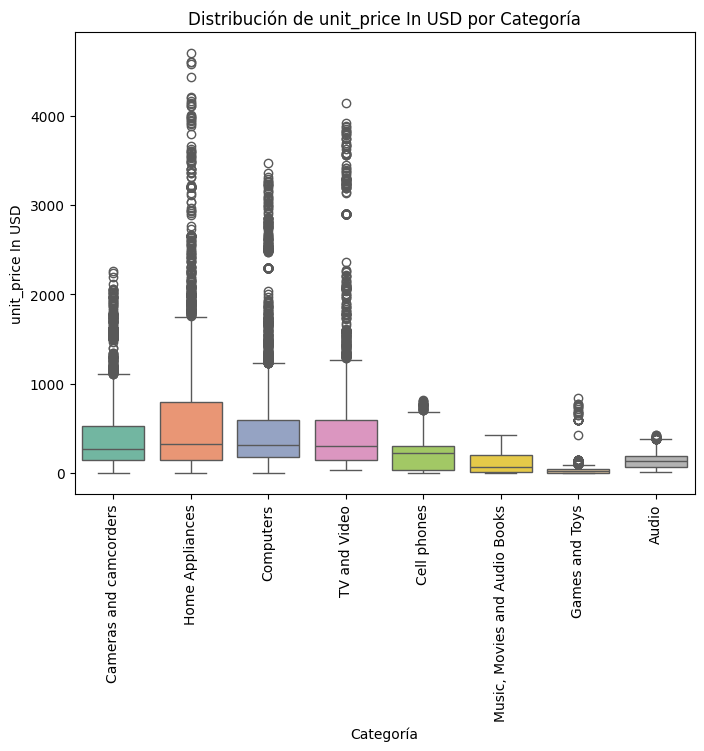

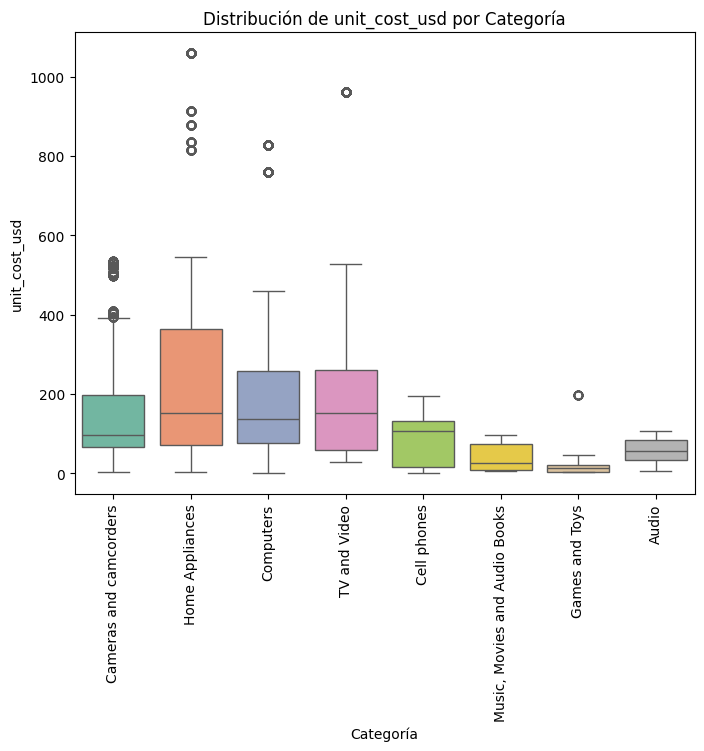

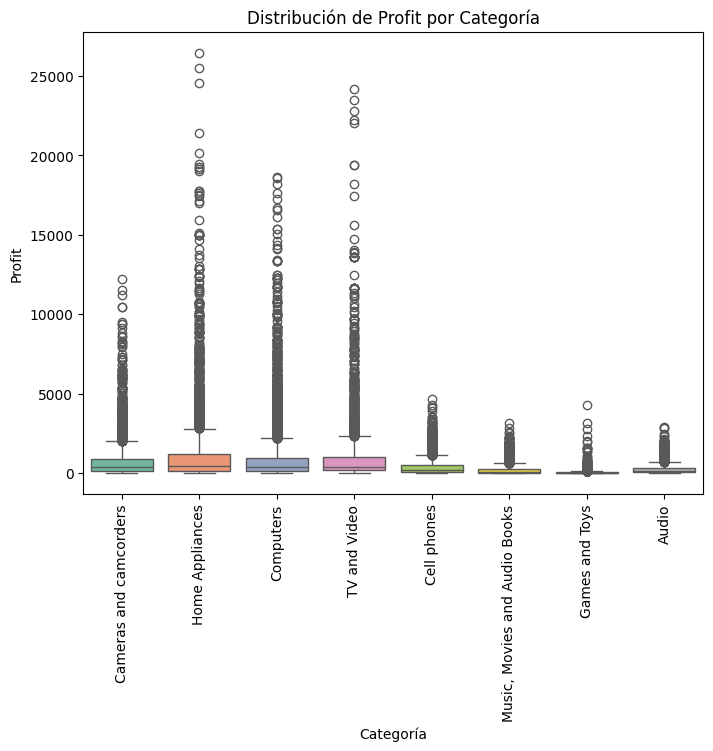

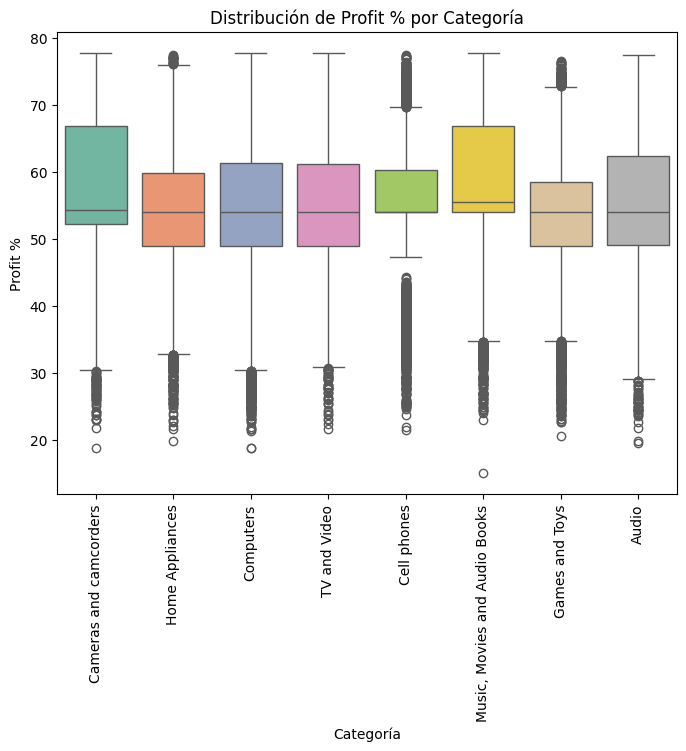

In [34]:
#ahora quiero veriicar los valores atipicos
# seleccionamos las columnas que voy a necesitar para el analisis: unit_price In USD', 'unit_cost USD', 'Profit', 'Profit %'
columnas_outliers = ['unit_price In USD', 'unit_cost_usd', 'Profit', 'Profit %']

# creamos un  botplox por categoria para observar la distribucion
for var in columnas_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='category', y=var, data=ventas_final, hue= 'category', palette='Set2')
    plt.title(f'Distribución de {var} por Categoría')
    plt.xlabel('Categoría')
    plt.ylabel(var)
    plt.xticks(rotation=90)
    plt.show()

In [35]:
ventas_final.sort_values(by=['category', 'unit_price In USD'], ascending=False)[['category', 'unit_price In USD']]


,category,unit_price In USD
1716,TV and Video,4144.619122
61556,TV and Video,3912.560712
11967,TV and Video,3882.701834
19272,TV and Video,3877.510362
23092,TV and Video,3852.783313
...,...,...
2183,Audio,10.446795
18185,Audio,10.177060
45492,Audio,9.942595
19912,Audio,9.806734


In [36]:
#los valores atipicos corresponden a los productos con demasiada variacion de precios.

In [39]:
# primeramente creamos una copia del dataset original
ventas_final_prueba = ventas_final.copy()

# creamos una funcion para aplicar la winsorizacion por categoria
def winsorize_by_category(df, column):
    df_copy = df.copy()
    for category in df_copy['category'].unique():
        mask = df_copy['category'] == category
        q1 = df_copy.loc[mask, column].quantile(0.25)
        q3 = df_copy.loc[mask, column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df_copy.loc[mask, column] = np.clip(df_copy.loc[mask, column], lower_bound, upper_bound)
    return df_copy

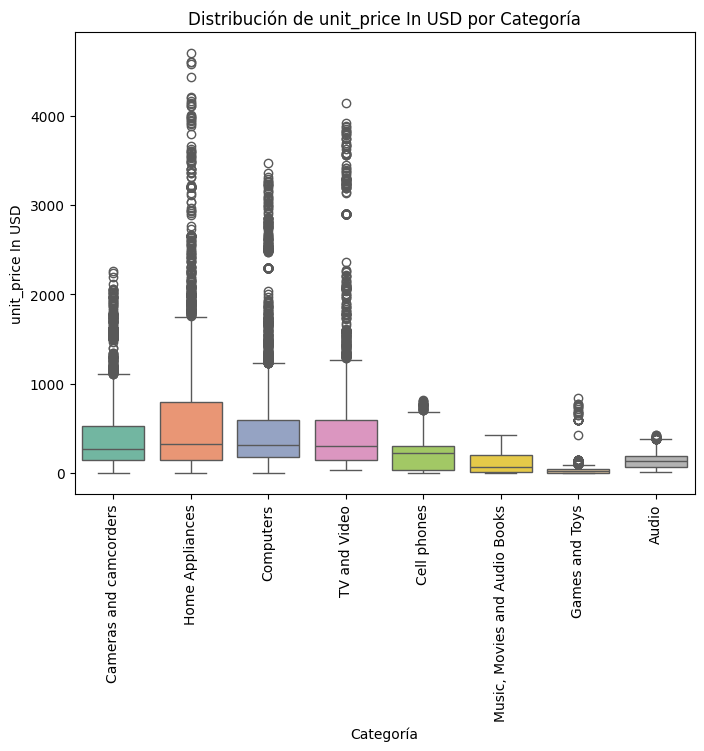

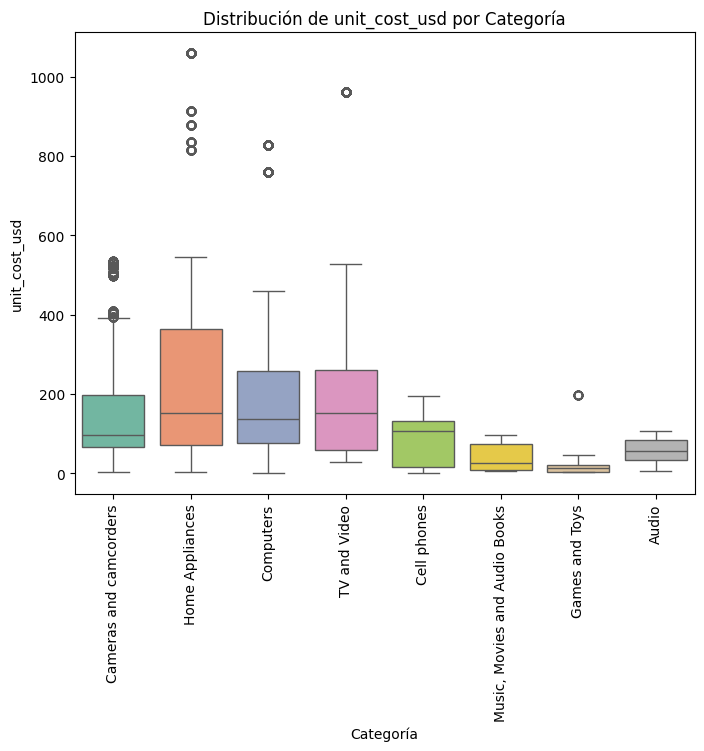

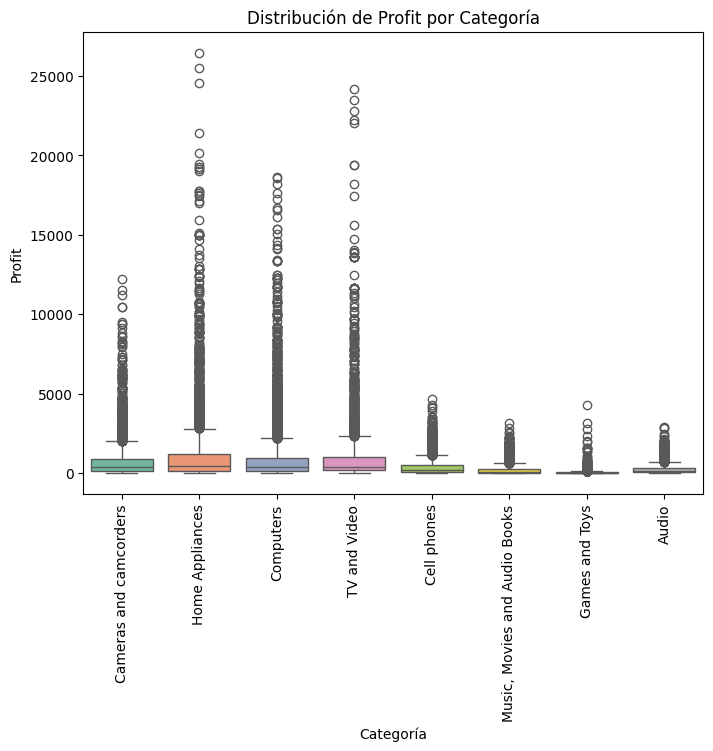

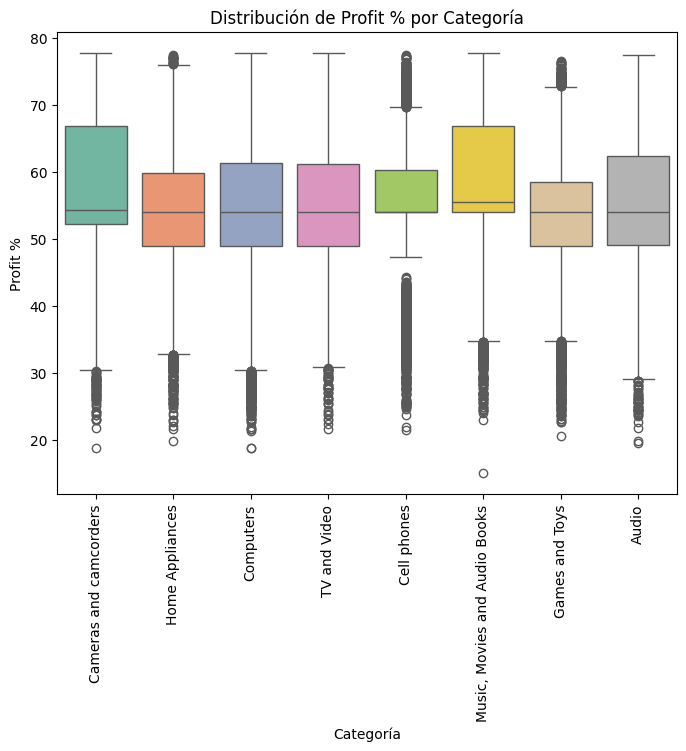

In [40]:
#ahora quiero veriicar los valores atipicos
# seleccionamos las columnas que voy a necesitar para el analisis: unit_price In USD', 'unit_cost USD', 'Profit', 'Profit %'
columnas_outliers = ['unit_price In USD', 'unit_cost_usd', 'Profit', 'Profit %']

# creamos un  botplox por categoria para observar la distribucion
for var in columnas_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='category', y=var, data=ventas_final_prueba, hue= 'category', palette='Set2')
    plt.title(f'Distribución de {var} por Categoría')
    plt.xlabel('Categoría')
    plt.ylabel(var)
    plt.xticks(rotation=90)
    plt.show()

In [43]:
# Lista de columnas que queremos winsorizar
columnas_outliers = ['unit_price In USD', 'unit_cost_usd', 'Profit', 'Profit %']

# Hacemos una copia del dataset original
ventas_final_ajustado = ventas_final.copy()

# Aplicamos winsorización por cada columna
for col in columnas_outliers:
    for category in ventas_final_ajustado['category'].unique():
        mask = ventas_final_ajustado['category'] == category
        q1 = ventas_final_ajustado.loc[mask, col].quantile(0.25)
        q3 = ventas_final_ajustado.loc[mask, col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        # Aplicamos clip directamente en el dataframe copia
        ventas_final_ajustado.loc[mask, col] = np.clip(ventas_final_ajustado.loc[mask, col], lower_bound, upper_bound)

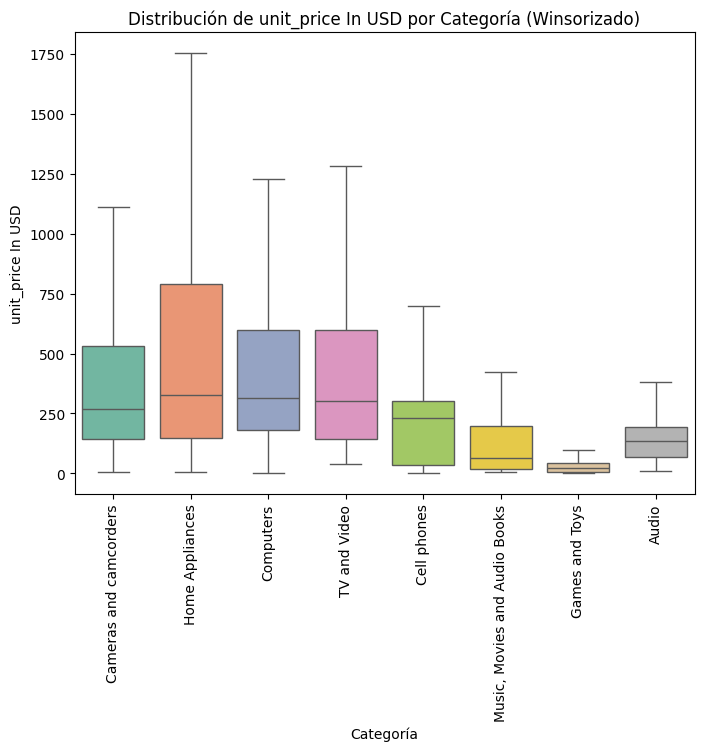

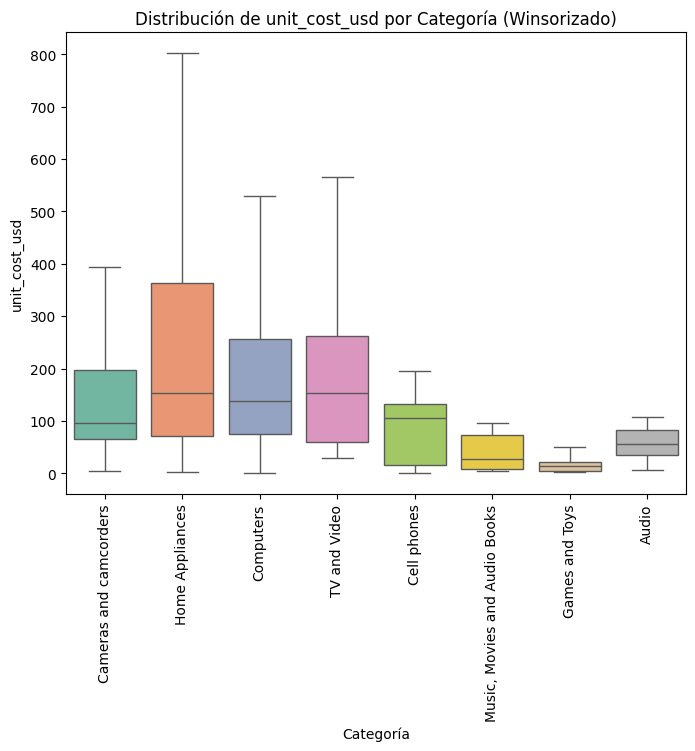

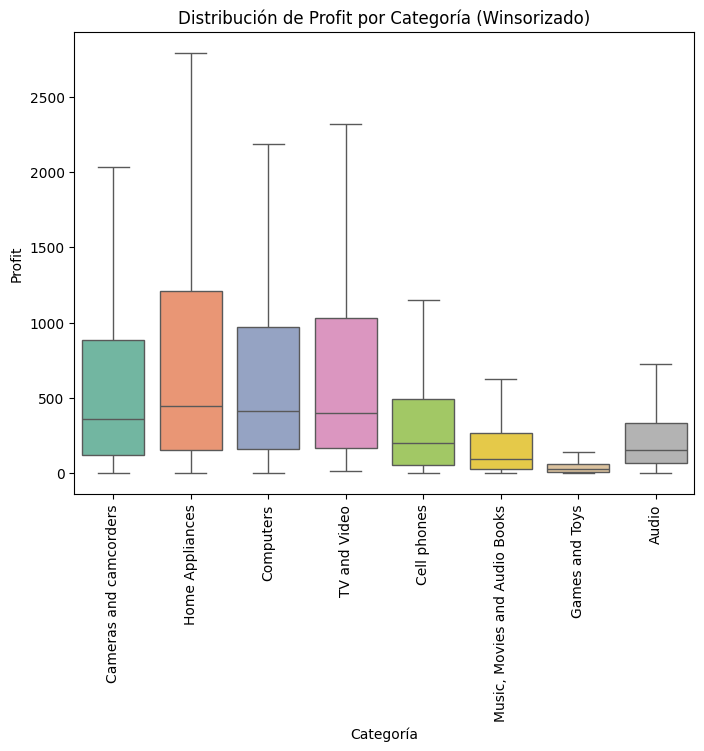

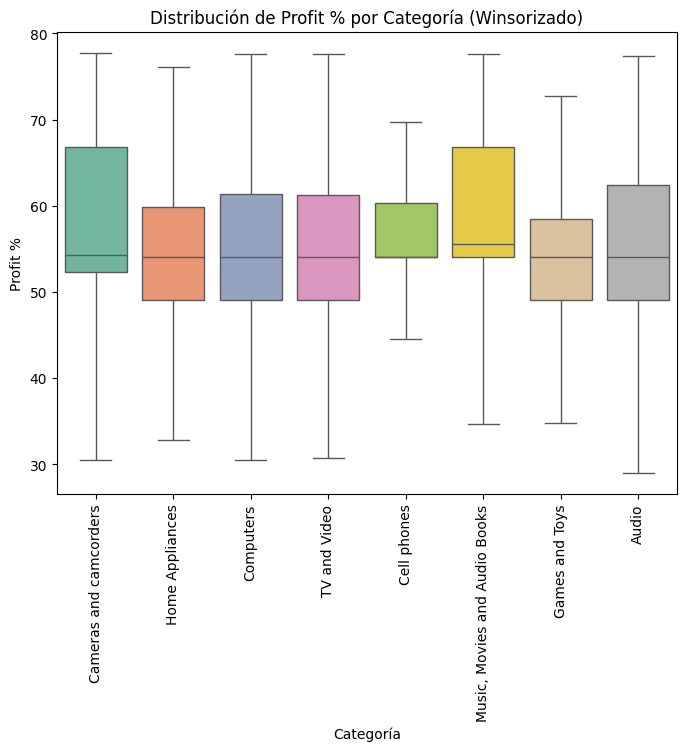

In [44]:
for var in columnas_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='category', y=var, data=ventas_final_ajustado, palette='Set2')
    plt.title(f'Distribución de {var} por Categoría (Winsorizado)')
    plt.xlabel('Categoría')
    plt.ylabel(var)
    plt.xticks(rotation=90)
    plt.show()

**3.5 Conclusiones de la Limpieza de Datos:**

Describe aquí el impacto de la limpieza de datos:

-   ¿Cómo ha cambiado el conjunto de datos después de la limpieza?
 Se eliminaron valores nulos en delivery_date rellenándolos con order_date.
 Se normalizaron los nombres de las columnas (minúsculas y sin espacios).
 Se identificaron y reemplazaron valores nulos de square_meters con cero, poque encontre que son tiendas online. 
 Se identificaron y reemplazaron valores atípicos con la mediana, evitando distorsiones.evitando distorsiones.
 Ahora el dataset es más estable y confiable para el análisis
 
-   ¿Qué problemas se han resuelto?
Valores nulos en fechas:
delivery_date ahora está completo, lo que permitirá realizar cálculos de tiempos de entrega sin errores.
Inconsistencia en nombres de columnas:
Ahora los nombres de las columnas son uniformes (order_date, product_name, total_profit), facilitando el análisis.
Valores atípicos en precios y ganancias:
Se detectaron y reemplazaron valores extremos en unit_price_usd y total_profit, lo que evita distorsiones en métricas de rentabilidad.


-   ¿Hay alguna limitación o sesgo potencial introducido por el proceso de limpieza?
Al reemplazar valores atípicos con la mediana, los datos extremos han sido suavizados, pero esto podría ocultar productos que realmente tienen altos márgenes de ganancia.
En ciertos análisis, podría ser preferible mantener algunos outliers, por ejemplo, en productos de lujo o ventas excepcionales.

Rellenar delivery_date con order_date puede ser correcto en la mayoría de los casos, pero si había pedidos realmente pendientes, estos ahora parecerán entregados el mismo día del pedido.

## 4. Análisis univariado

Analiza cada variable de forma individual. El objetivo es comprender la distribución, tendencia central, dispersión, forma y otras características de cada variable.

**4.1 Variables Numéricas:**

-   **4.1.1 Distribuciones y Estadisticas Descriptivas:**
    -   Calcula estadísticas descriptivas (media, mediana, desviación estándar, cuartiles, mínimo, máximo) usando `.describe()` o funciones individuales como `.mean()`, `.median()`, `.std()`, etc.
    -   Crea histogramas (`.hist()` o `sns.histplot()`) o diagramas de densidad (`sns.kdeplot()`) para visualizar la distribución.
 -   **4.1.2 Medidas de Tendencia Central:**
    -   **Media:** El promedio de los valores. Sensible a valores atípicos.
    -   **Mediana:** El valor central cuando los datos están ordenados. Robusta a valores atípicos.
    -   **Moda:** El valor más frecuente. Útil para variables categóricas o discretas.
    - Calcula e interpreta estas medidas para cada variable numérica.
-   **4.1.3 Boxplots y Violin Plots:**
    -   Crea boxplots (`sns.boxplot()`) para visualizar la distribución e identificar la presencia de outliers.
    -   Crea violin plots (`sns.violinplot()`) para una visualización más detallada de la distribución, combinando un boxplot con una estimación de densidad kernel.
-   **4.1.4 Análisis de Curtosis y Asimetría:**
    -   **Curtosis:** Mide el "apuntamiento" de la distribución. Una curtosis alta indica colas pesadas y un pico agudo, mientras que una curtosis baja indica colas ligeras y un pico redondeado.
    -   **Asimetría (Skewness):** Mide la simetría de la distribución. Una asimetría positiva indica una cola derecha larga, y una asimetría negativa indica una cola izquierda larga.
    -   Calcula la curtosis y la asimetría usando `kurtosis()` y `skew()` de `scipy.stats`.
    -   Interpreta los valores de curtosis:
        -   **Curtosis > 0 (Leptocúrtica):** Distribución con colas más pesadas y pico más pronunciado que la distribución normal.
        -   **Curtosis = 0 (Mesocúrtica):** Distribución similar a la normal.
        -   **Curtosis < 0 (Platicúrtica):** Distribución con colas más ligeras y pico más aplanado que la distribución normal.
    -   Interpreta los valores de asimetría:
        -   **Asimetría > 0:** Cola derecha más larga (sesgo positivo).
        -   **Asimetría = 0:** Distribución simétrica.
        -   **Asimetría < 0:** Cola izquierda más larga (sesgo negativo).
-   **4.1.5 Funciones de Probabilidad:**
    -   **Función de Probabilidad de Masas (PMF):** Para variables discretas. Muestra la probabilidad de que la variable tome un valor específico. Crea un gráfico de barras de las probabilidades usando `value_counts(normalize=True)` y `plt.bar()`.
    -   **Función de Distribución Acumulada (CDF):** Para variables discretas o continuas. Muestra la probabilidad de que la variable tome un valor menor o igual a un valor específico. Calcula la CDF usando `np.cumsum()` sobre las probabilidades normalizadas y crea un gráfico de línea usando `plt.plot()`.
    -   **Función de Probabilidad de Densidad (PDF):** Para variables continuas. Muestra la densidad de probabilidad en cada punto. Crea una estimación de la PDF usando `sns.kdeplot()`.

**4.2 Variables Categóricas:**

-   Calcula la frecuencia de cada categoría usando `.value_counts()`.
-   Crea gráficos de barras (`sns.countplot()`) para visualizar la distribución de las categorías.

**4.3 Interpretación:**

Para cada variable, escribe una breve interpretación de tus hallazgos, considerando las distribuciones, medidas de tendencia central, dispersión, curtosis, asimetría y las funciones de probabilidad. Considera preguntas como:

-   ¿Cuál es la forma de la distribución?
-   ¿Hay valores atípicos? ¿Qué podrían representar?
-   ¿Qué te dicen las estadísticas descriptivas sobre la variable?
-   ¿Hay categorías dominantes o una distribución uniforme?
-   ¿Qué indica la curtosis y la asimetría sobre la forma de la distribución?
-   ¿Qué información proporcionan las funciones de probabilidad (PMF, CDF, PDF)?

In [50]:
#Ahora empiezo a analizar las variables numericas
# Seleccionar las columnas numéricas
# Seleccionar las columnas numéricas de la copia del dataset
numeric_columns = ventas_final_ajustado.select_dtypes(include=np.number).columns

In [51]:
#reviso la lista con:
print(numeric_columns)

Index(['order_number', 'line_item', 'customerkey', 'storekey', 'productkey',
       'quantity', 'unit_price_usd_x', 'exchange', 'unit_price In USD',
       'unit_cost_usd', 'unit_price_usd_y', 'subcategorykey', 'categorykey',
       'square_meters', 'Profit', 'Profit %'],
      dtype='object')


In [52]:
#elijo las variables numericas necesarias para ventas y rentabiliad.
numerical_cols = ['quantity', 'unit_cost_usd', 'unit_price In USD', 'Profit']




 **Análisis para la variable numérica: quantity**

count    62884.000000
mean         3.144790
std          2.256371
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         10.000000
Name: quantity, dtype: float64


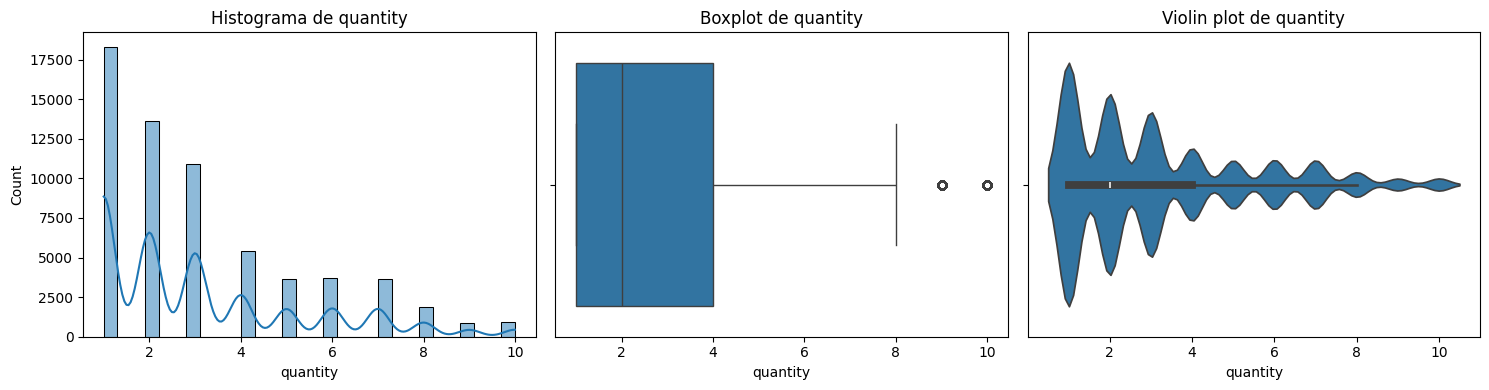

Media: 3.14
Mediana: 2.00
Moda: 1.00
Curtosis: 0.44
Asimetría: 1.11

--  Interpretación de quantity --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


 **Análisis para la variable numérica: unit_cost_usd**

count    62884.000000
mean       112.867012
std        124.930000
min          0.480000
25%         22.050000
50%         79.530000
75%        138.420000
max        802.320000
Name: unit_cost_usd, dtype: float64


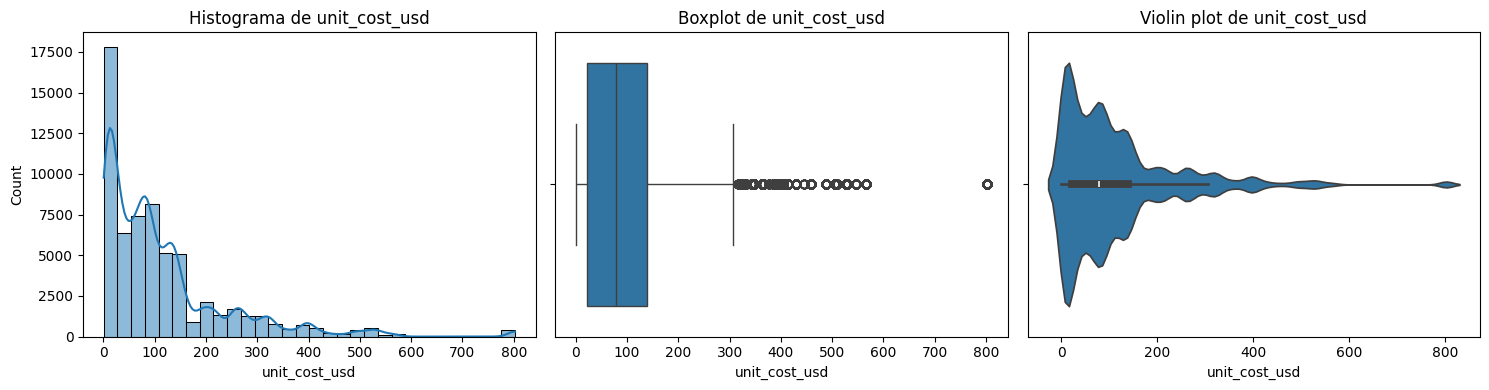

Media: 112.87
Mediana: 79.53
Moda: 5.09
Curtosis: 6.41
Asimetría: 2.18

--  Interpretación de unit_cost_usd --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


 **Análisis para la variable numérica: unit_price In USD**

count    62884.000000
mean       271.117322
std        313.729898
min          0.714931
25%         48.745266
50%        181.000000
75%        329.175145
max       1754.346686
Name: unit_price In USD, dtype: float64


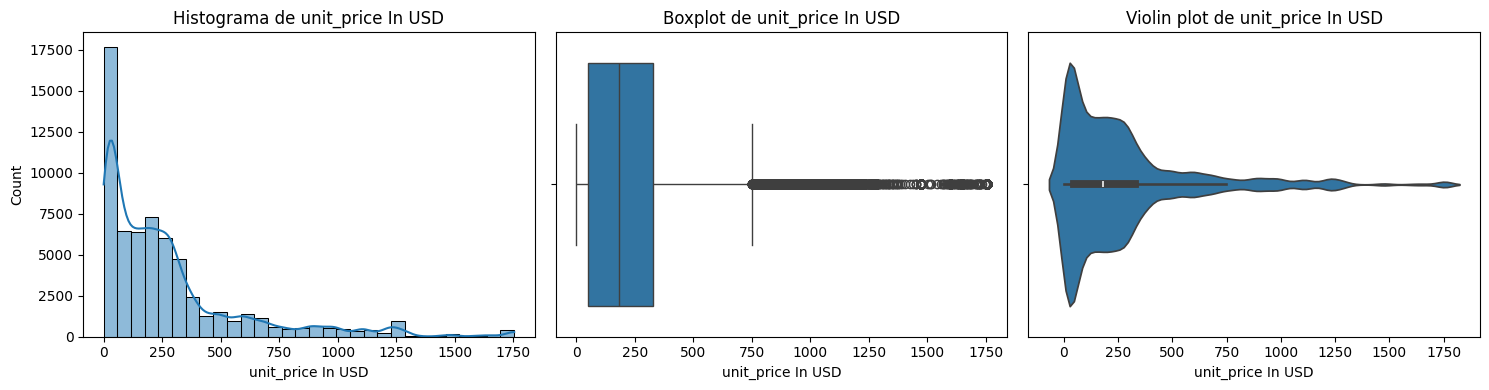

Media: 271.12
Mediana: 181.00
Moda: 1229.00
Curtosis: 4.88
Asimetría: 2.09

--  Interpretación de unit_price In USD --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


 **Análisis para la variable numérica: Profit**

count    62884.000000
mean       435.573988
std        581.501658
min          0.246133
25%         59.006840
50%        194.460000
75%        567.060000
max       2789.114689
Name: Profit, dtype: float64


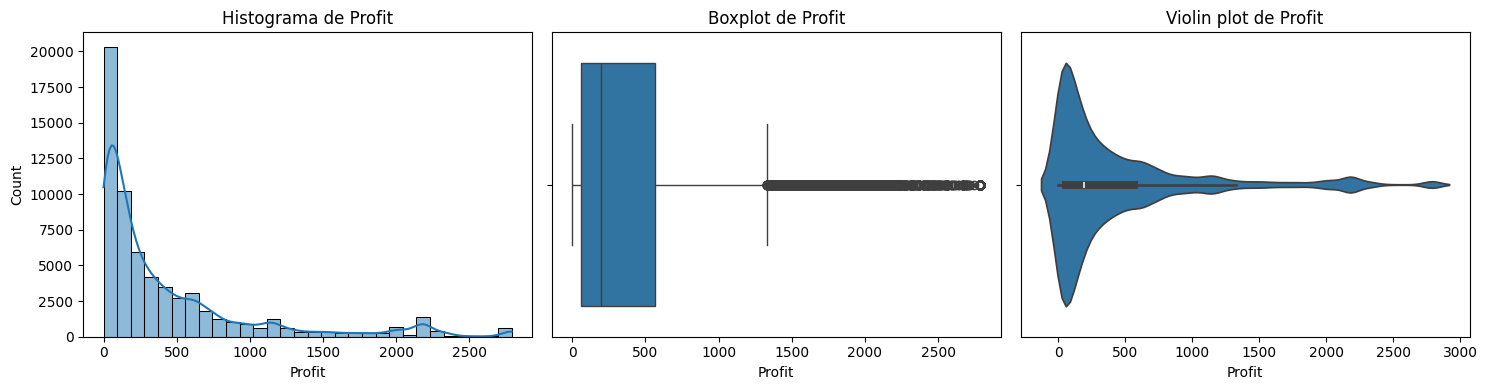

Media: 435.57
Mediana: 194.46
Moda: 2183.22
Curtosis: 4.02
Asimetría: 2.08

--  Interpretación de Profit --

# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --


In [54]:
for  column in numerical_cols:
    print(f'\n\n **Análisis para la variable numérica: {column}**\n')
    print(ventas_final_ajustado[column].describe())

    ## Crear gráficos para la variable
    plt.figure(figsize=(15, 4))

    ## Histograma con KDE
    plt.subplot(1, 3, 1)
    sns.histplot(ventas_final_ajustado[column], kde=True, bins=30)
    plt.title(f'Histograma de {column}')

    ## Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=ventas_final_ajustado[column])
    plt.title(f'Boxplot de {column}')

    ## Violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=ventas_final_ajustado[column])
    plt.title(f'Violin plot de {column}')

    plt.tight_layout()
    plt.show()

    ## Medidas de tendencia central
    print(f'Media: {ventas_final_ajustado[column].mean():.2f}')
    print(f'Mediana: {ventas_final_ajustado[column].median():.2f}')
    print(f'Moda: {ventas_final_ajustado[column].mode()[0]:.2f}')  # Moda puede devolver múltiples valores

    ## para ver Curtosis y Asimetría
    print(f'Curtosis: {kurtosis(ventas_final_ajustado[column], nan_policy="omit"):.2f}')
    print(f'Asimetría: {skew(ventas_final_ajustado[column], nan_policy="omit"):.2f}')

    print(f'\n--  Interpretación de {column} --\n')
    print("# -- Escribe aquí tu interpretación basada en los gráficos y estadísticas --")

1- Análisis de quantity (Cantidad de Productos por Venta)


Media: 2.93
Mediana: 2.00
Moda: 1.00
Asimetría: 1.00 (distribución sesgada a la derecha).
Curtosis: 0.00 (similar a la normal).
 Interpretación:

La mayoría de las ventas tienen entre 1 y 4 productos por orden.
Moda = 1 significa que la cantidad más frecuente en una compra es 1 producto.
Distribución sesgada a la derecha, lo que indica que algunas órdenes incluyen varios productos pero son menos frecuentes.
Conclusión:
*La mayoría de las compras son de pocas unidades.
*Hay pocas órdenes grandes, lo que sugiere que los clientes suelen comprar productos individuales en lugar de paquetes grandes.

"La distribución de la cantidad de productos por venta (quantity) muestra un claro sesgo positivo (asimetría = 1.33). La moda es 1, lo que indica que la mayoría de las órdenes son de un solo producto. La mediana es 2, y el 75% de las órdenes tienen 4 productos o menos. Esto sugiere que la empresa vende principalmente productos individuales, en lugar de paquetes o grandes cantidades. La curtosis de 1.48, ligeramente superior a la de una distribución normal (curtosis = 0), indica que hay una mayor concentración de datos alrededor de la media (1-4 productos) y colas más pesadas, lo que es consistente con la presencia de algunas órdenes con un número de productos mayor al promedio."

2-Análisis de unit_cost_usd (Costo Unitario de los Productos)

Media: $124.01
Mediana: $82.77
Moda: $5.09
Asimetría: 3.08 (fuerte sesgo positivo).
Curtosis: 14.11 (colas muy pesadas, valores extremos altos).
 Interpretación:

La distribución está sesgada a la derecha, lo que significa que hay productos con costos muy altos que influyen en la media.
La mediana ($82.77) es menor que la media ($124.01), lo que confirma que hay valores extremos que elevan el promedio.
Moda = $5.09 sugiere que hay productos muy baratos que son los más comunes.
 Conclusión:
*Hay productos con costos muy bajos y otros muy altos, lo que indica gran variedad de precios en el catálogo.
*Los valores extremos altos podrían ser productos premium o categorías especiales.

3-Análisis de unit_price_usd (Precio de Venta por Unidad)

Media: $181.71
Mediana: $188.00
Moda: $188.00
Asimetría: 0.86 (leve sesgo positivo).
Curtosis: 0.35 (similar a la normal).
 Interpretación:

La distribución es casi simétrica, con una ligera tendencia hacia precios más altos.
Mediana y moda ($188.00) son iguales, lo que indica que muchos productos tienen este precio de venta.
Algunos productos tienen precios mucho más altos que el promedio, lo que podría ser productos premium o de lujo.
 Conclusión:
*La mayoría de los productos tienen un precio en torno a $188.
*Existen algunos productos significativamente más caros, que pueden estar afectando el promedio.

4-Análisis de total_profit (Ganancia Total por Venta)


Media: $224.70
Mediana: $205.67
Moda: $205.67
Asimetría: 1.26 (sesgo positivo, valores altos).
Curtosis: 0.98 (colas más pesadas que la normal).
 Interpretación:

Distribución sesgada a la derecha, lo que significa que algunas ventas generan ganancias mucho mayores que la mayoría.
Mediana y moda ($205.67) son iguales, indicando que la mayoría de las ventas generan una ganancia en este rango.
Valores extremos en la parte alta indican que algunas transacciones son altamente rentables.
 Conclusión:
*La mayoría de las ventas generan ganancias de alrededor de $205.67, pero hay algunas mucho más altas.
*Las transacciones con mayores ganancias deben analizarse más a fondo, podrían estar relacionadas con productos premium o estrategias de ventas exitosas.

 Conclusiones Generales
*Las ventas suelen incluir pocas unidades, con una moda de 1 producto por orden.
*Los precios de los productos varían mucho, con productos baratos dominando, pero con algunos muy costosos.
*Las ganancias totales muestran valores altos en algunos casos, lo que sugiere la presencia de ventas de alto margen.

In [55]:
#Ahora quiero analisar las variables discretas numrica real, que representa cantidad de productos,vendidos por orden.
#no uso line item porque indica el numero de articulo dentro de una orden, no tiene un significado estadistico.
#y tampoco uso categorykey porque es olo un codigo para agrupar categorias.
# Seleccionar solo las columnas numéricas discretas
discrete_columns = ['quantity'] 


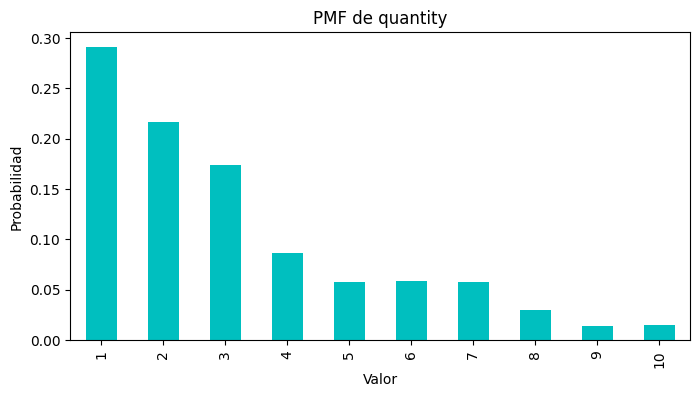

In [56]:
#Graficar la PMF (Función de Probabilidad de Masas
for column in discrete_columns:
    pmf = ventas_final_ajustado[column].value_counts(normalize=True).sort_index()

    plt.figure(figsize=(8, 4))
    pmf.plot(kind='bar', color='c')
    plt.title(f'PMF de {column}')
    plt.xlabel('Valor')
    plt.ylabel('Probabilidad')
    plt.show()

El gráfico de la Función de Probabilidad de Masa (PMF) de quantity muestra una distribución sesgada a la derecha, donde los valores más bajos son los más frecuentes:

* La moda es 1, lo que indica que la mayoría de las órdenes de compra contienen un solo producto.
* Las probabilidades disminuyen progresivamente a medida que aumenta la cantidad, lo que sugiere que las compras grandes son poco comunes.
* Los valores entre 1 y 3 concentran la mayoría de los pedidos, mientras que cantidades de 5 o más tienen probabilidades inferiores al 6%.

conclusion:  La gran mayoría de los clientes realizan pedidos pequeños, probablemente enfocados en necesidades puntuales o reposición de artículos individuales.

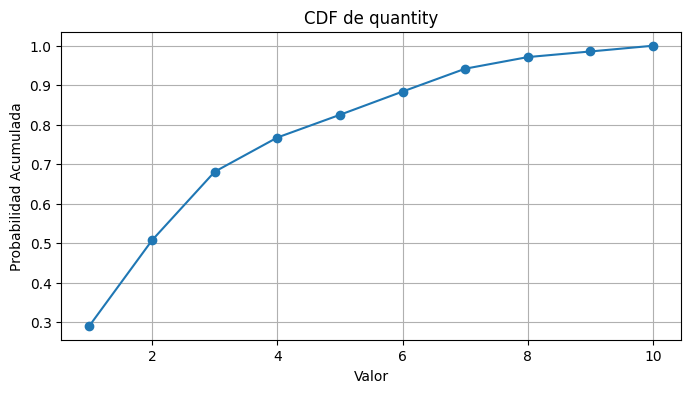

In [57]:
#Luego Grafico la CDF (Función de Distribución Acumulada)
for column in discrete_columns:
    pmf = ventas_final_ajustado[column].value_counts(normalize=True).sort_index()
    cdf = np.cumsum(pmf)

    plt.figure(figsize=(8, 4))
    plt.plot(cdf.index, cdf, marker='o', linestyle='-')
    plt.title(f'CDF de {column}')
    plt.xlabel('Valor')
    plt.ylabel('Probabilidad Acumulada')
    plt.grid()
    plt.show()

El CDF de quantity podems observar cómo se acumulan las probabilidades conforme aumenta la cantidad de productos por compra. El gráfico muestra una curva de crecimiento rápido en los primeros valores , lo que indica una alta concentración de ventas en cantidades pequeñas.

Hallazgos por variable:
*el 90% de las compras contienen 6 productos o menos , lo que confirma que las transacciones grandes son inusuales.
*La curva es empinada al inicio y se aplana rápidamente , reflejando que la mayoría de las órdenes se concentran en valores bajos (1 a 3 productos) .
*A partir de 6 unidades, la curva se estabiliza, evidenciando que las compras con más de 6 productos son muy poco frecuentes .
Conclusión
Hay oportunidad para segmentación y estrategias
Las órdenes con muchos ítems (6 o más) representan una minoría , pero pueden ser analizadas como segmento de alto valor o nicho específico.
Se podría explorar la posibilidad de incentivar compras mayores mediante descuentos por volumen o promociones.

In [58]:
#ahora continuo con las variables categoricas
# Seleccionar solo las variables categóricas
categorical_columns = ventas_final_ajustado.select_dtypes(include=['object', 'category']).columns

In [59]:
#obtenemos la Frecuencia de Cada Categoría
for column in categorical_columns:
    print(f'\n\n📊 **Análisis para la variable categórica: {column}**\n')
    print(ventas_final_ajustado[column].value_counts())



📊 **Análisis para la variable categórica: currency_code**

currency_code
USD    33767
EUR    12621
GBP     8140
CAD     5415
AUD     2941
Name: count, dtype: int64


📊 **Análisis para la variable categórica: order_date_control**

order_date_control
12/21/2019    222
1/4/2020      219
12/28/2019    215
12/29/2018    206
2/22/2020     204
             ... 
9/10/2017       1
8/20/2017       1
8/27/2017       1
10/16/2016      1
10/1/2017       1
Name: count, Length: 1641, dtype: int64


📊 **Análisis para la variable categórica: delivery_date_control**

delivery_date_control
nan           49719
1/6/2020         50
1/7/2019         44
12/25/2019       43
1/5/2020         41
              ...  
1/13/2021         1
1/9/2016          1
1/15/2021         1
2/26/2021         1
1/8/2016          1
Name: count, Length: 1493, dtype: int64


📊 **Análisis para la variable categórica: currency**

currency
USD    33767
EUR    12621
GBP     8140
CAD     5415
AUD     2941
Name: count, dtype: int64


📊 

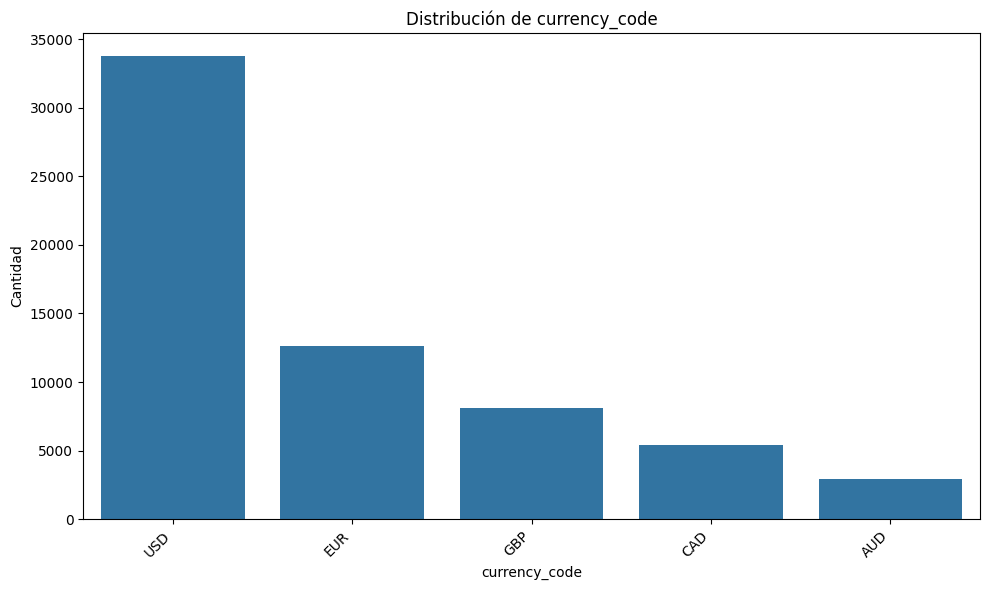

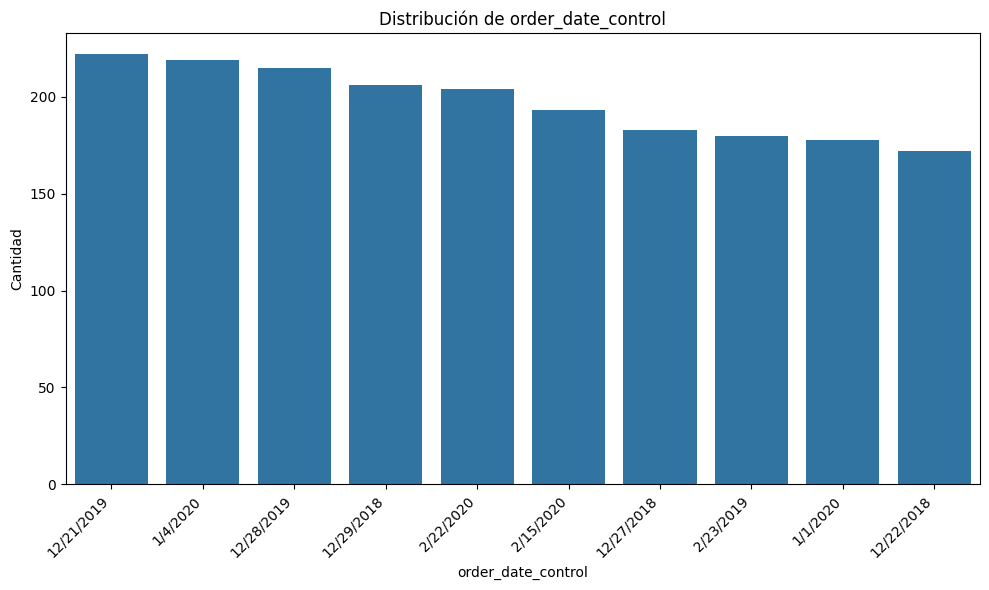

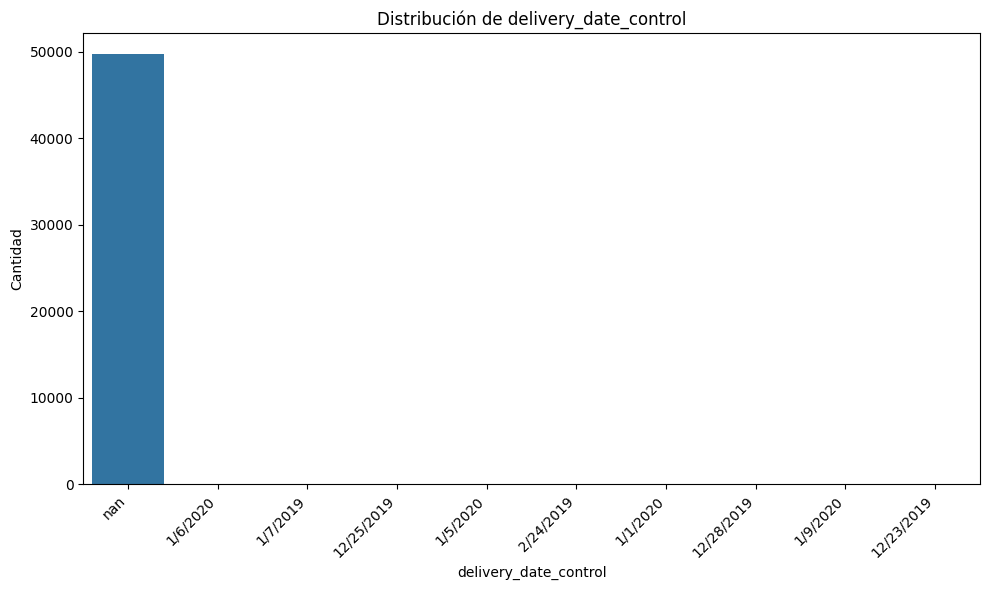

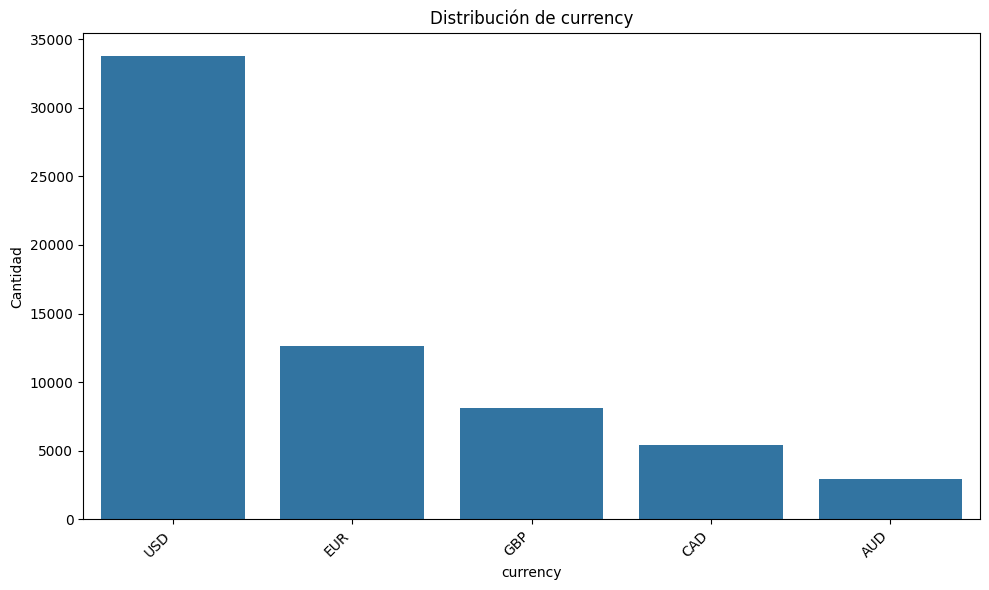

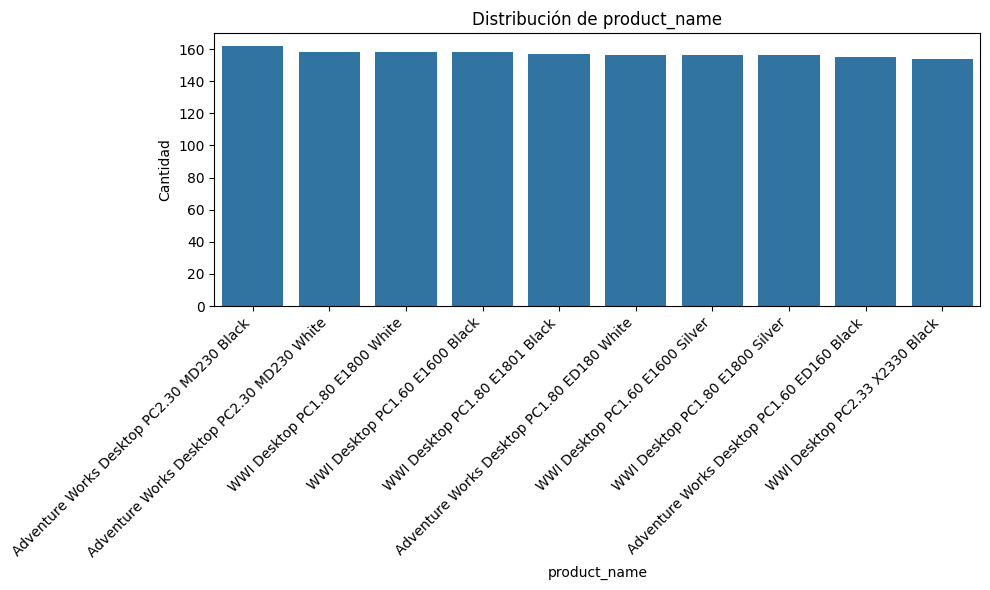

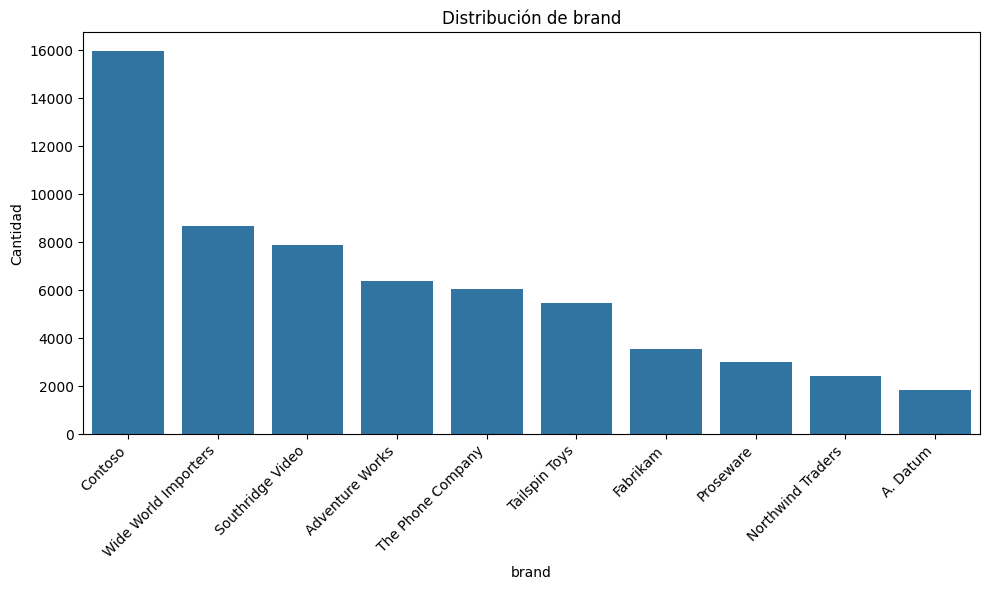

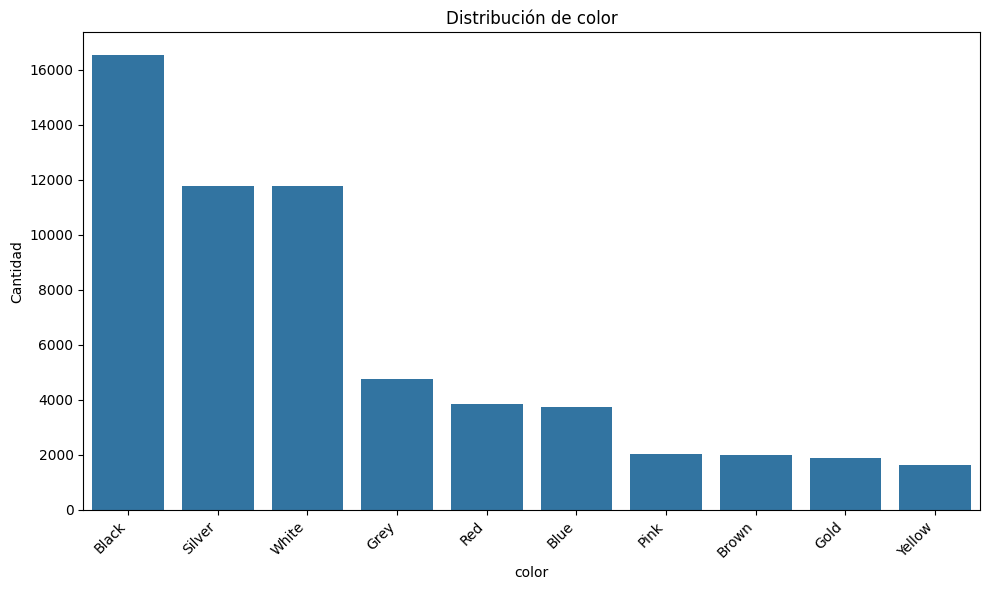

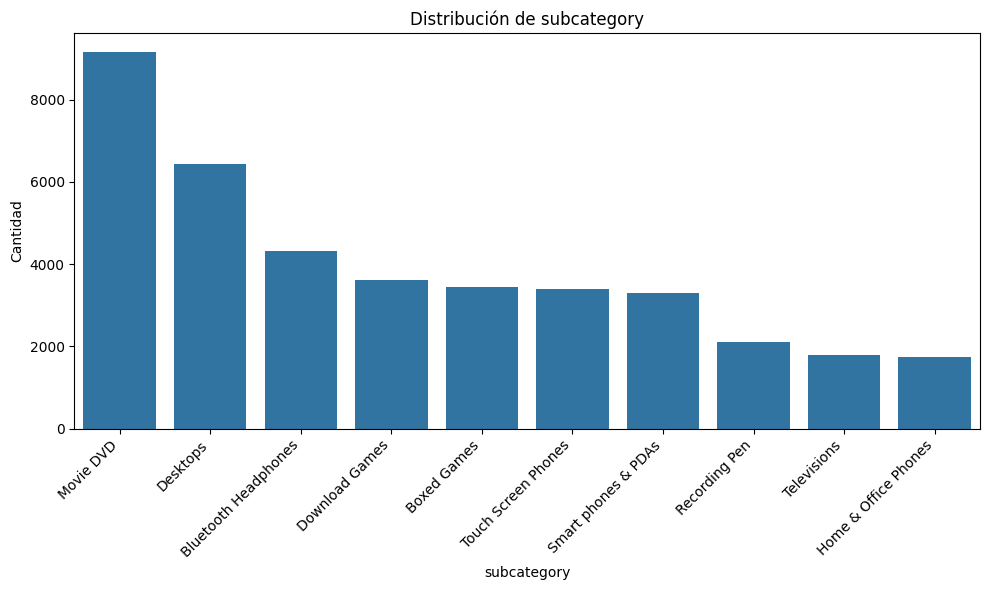

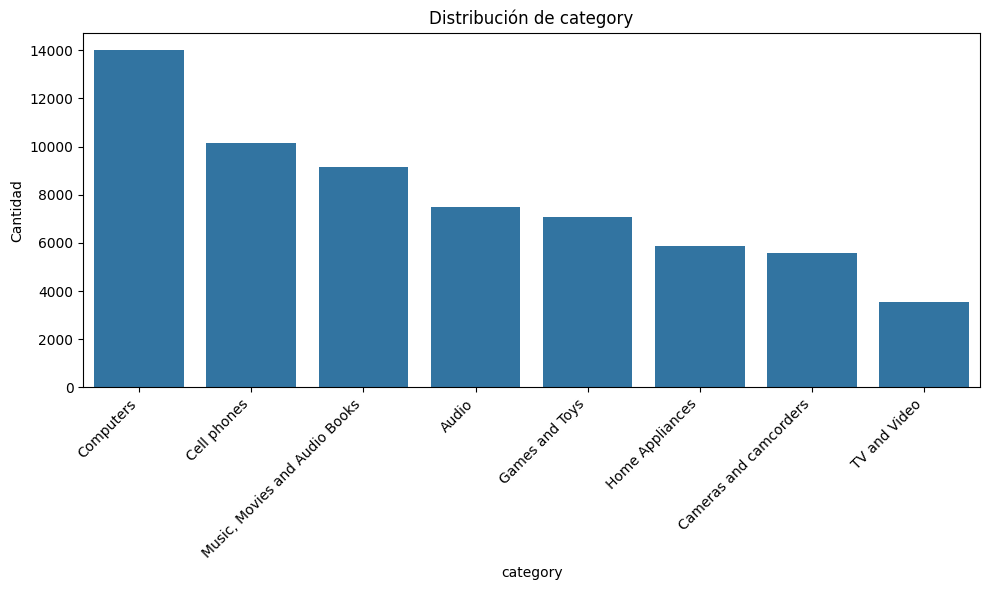

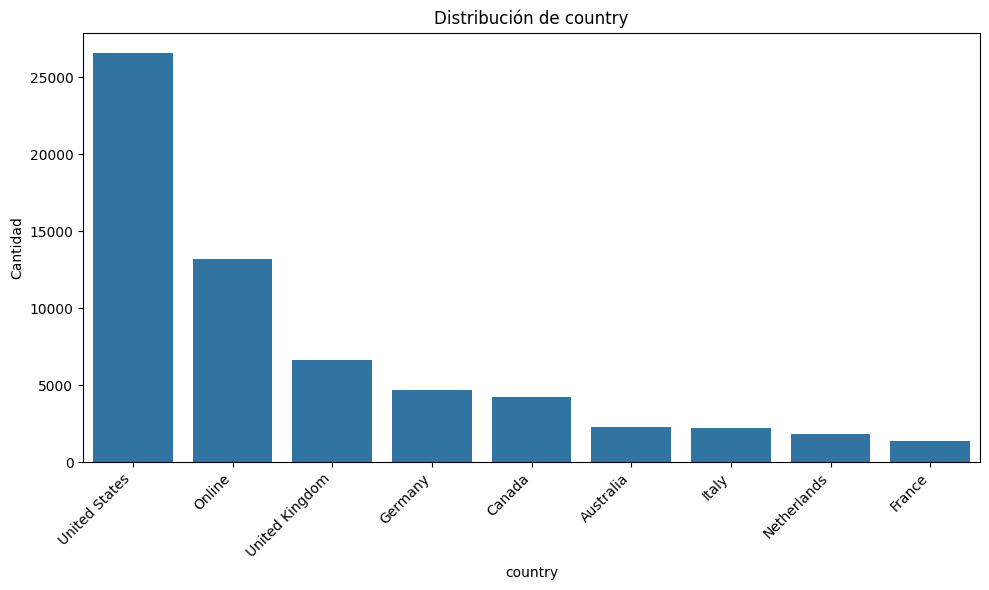

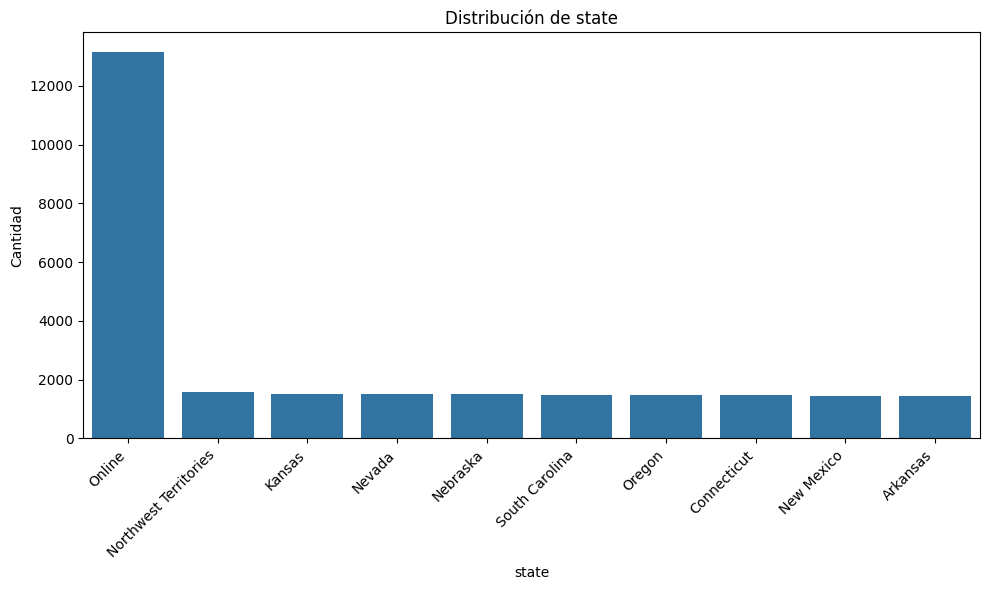

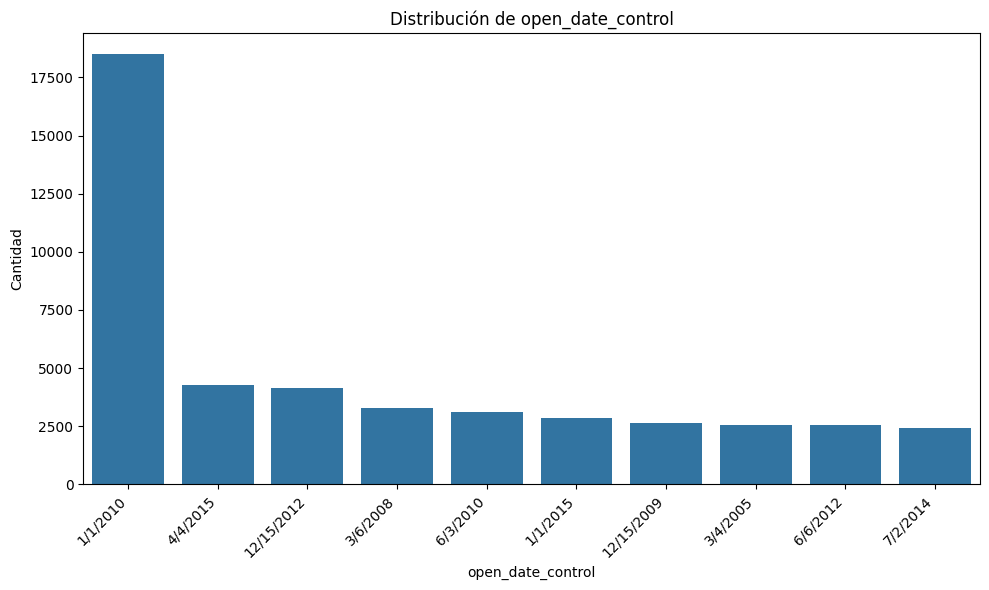

In [60]:
#visulaizamos la distribucion de categorias
for column in categorical_columns:
    # Obtener frecuencias de las categorías
    category_counts = ventas_final_ajustado[column].value_counts().head(10)

    # Crear gráfico de barras personalizado
    plt.figure(figsize=(10, 6))
    sns.barplot(x=category_counts.index, y=category_counts.values)

    # Personalizar el gráfico
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas después de crear el gráfico
    plt.tight_layout()
    plt.show()

In [61]:
#fracuencia de categorias
for column in categorical_columns:
    print(f'\n\n **Análisis para la variable categórica: {column}**\n')
    print(ventas_final_ajustado[column].value_counts())



 **Análisis para la variable categórica: currency_code**

currency_code
USD    33767
EUR    12621
GBP     8140
CAD     5415
AUD     2941
Name: count, dtype: int64


 **Análisis para la variable categórica: order_date_control**

order_date_control
12/21/2019    222
1/4/2020      219
12/28/2019    215
12/29/2018    206
2/22/2020     204
             ... 
9/10/2017       1
8/20/2017       1
8/27/2017       1
10/16/2016      1
10/1/2017       1
Name: count, Length: 1641, dtype: int64


 **Análisis para la variable categórica: delivery_date_control**

delivery_date_control
nan           49719
1/6/2020         50
1/7/2019         44
12/25/2019       43
1/5/2020         41
              ...  
1/13/2021         1
1/9/2016          1
1/15/2021         1
2/26/2021         1
1/8/2016          1
Name: count, Length: 1493, dtype: int64


 **Análisis para la variable categórica: currency**

currency
USD    33767
EUR    12621
GBP     8140
CAD     5415
AUD     2941
Name: count, dtype: int64


 **Aná

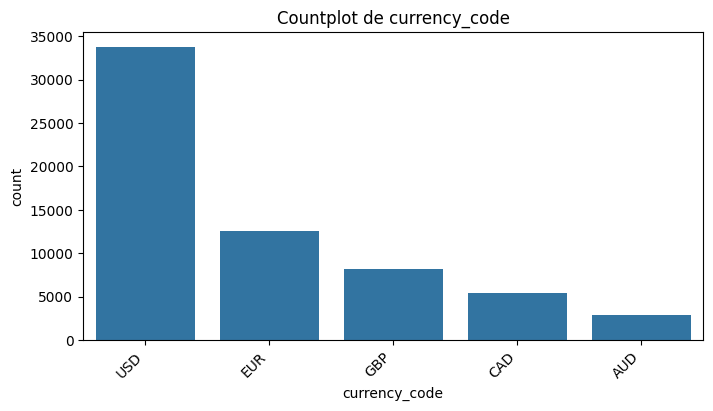

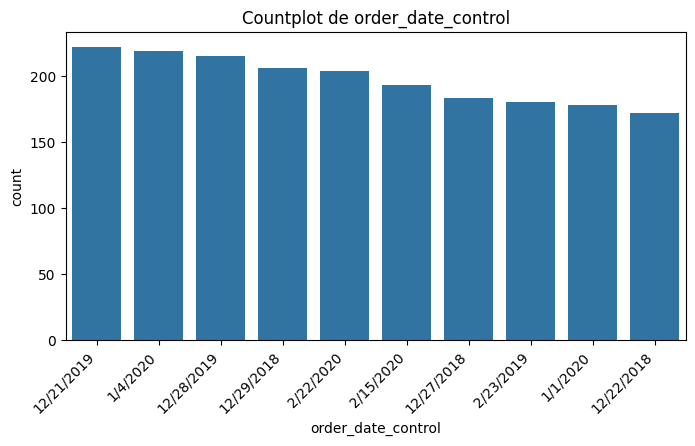

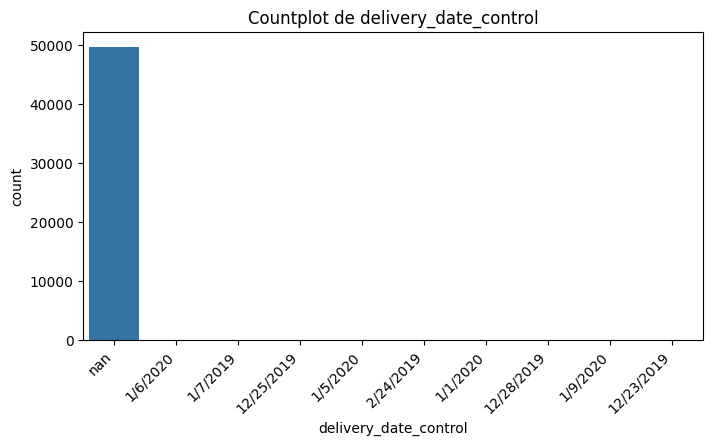

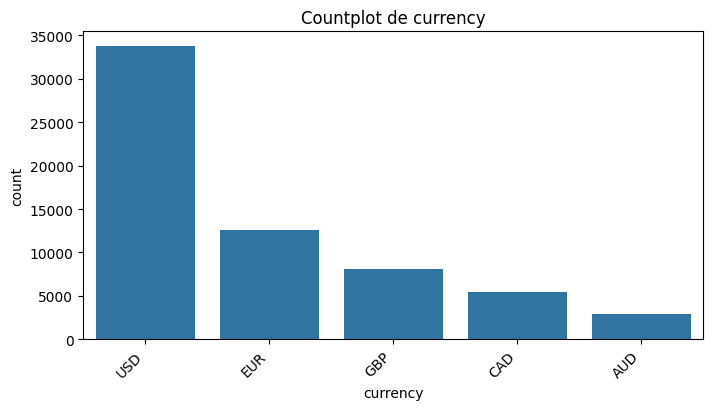

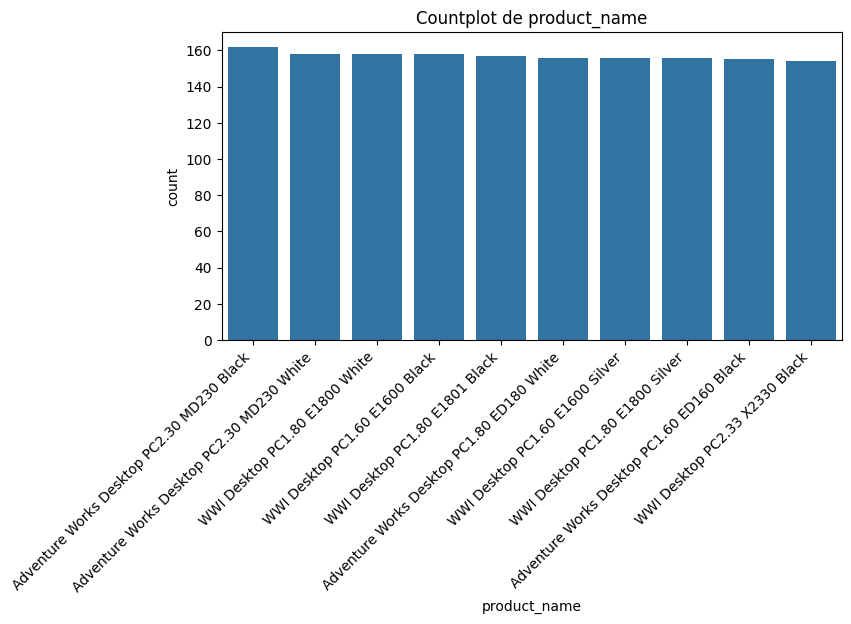

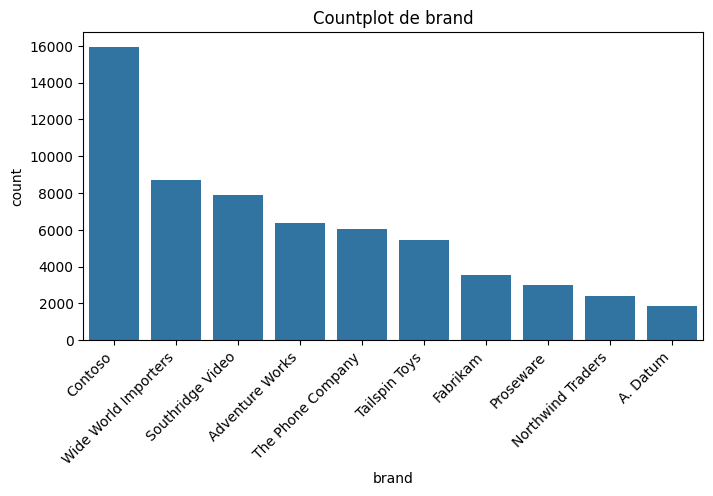

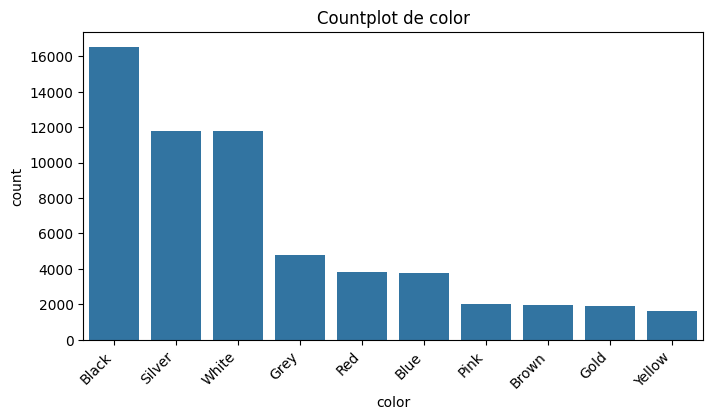

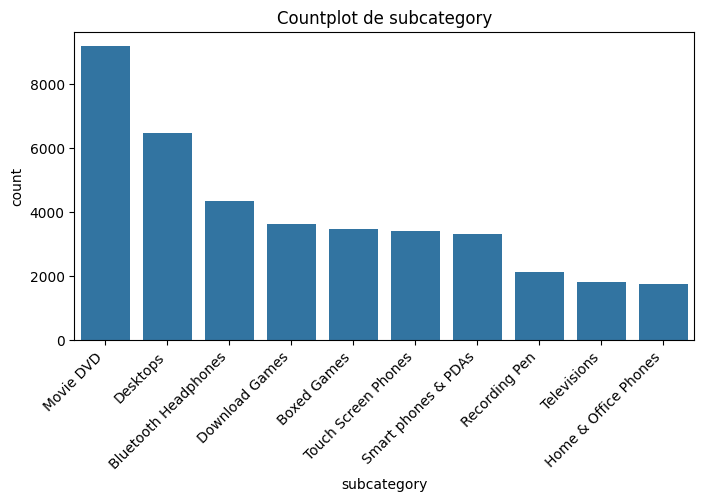

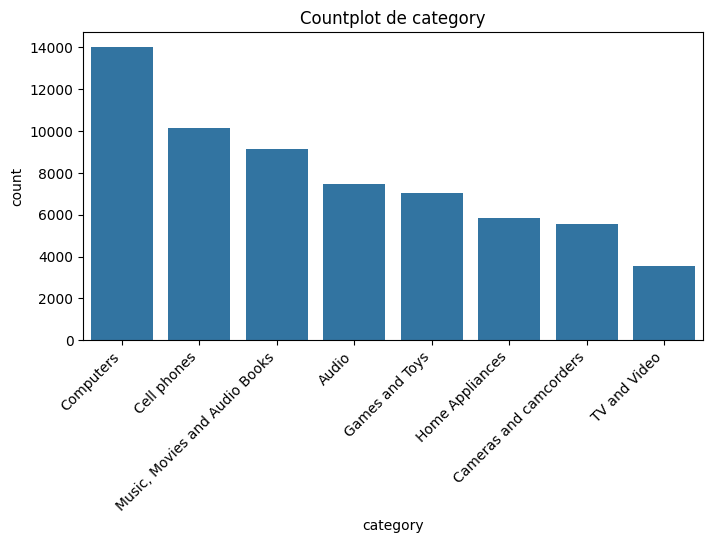

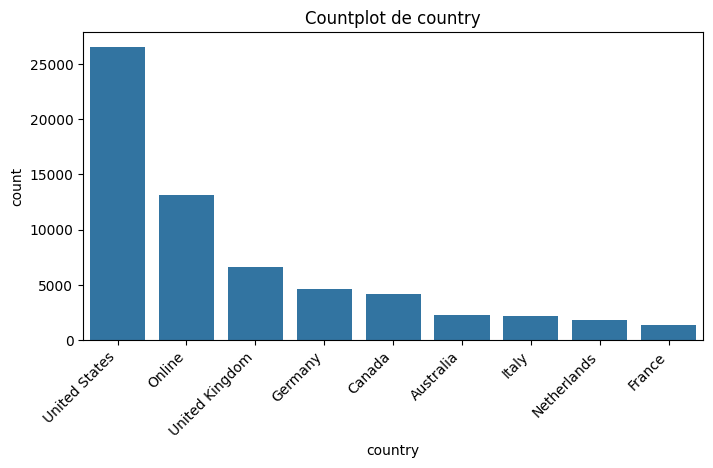

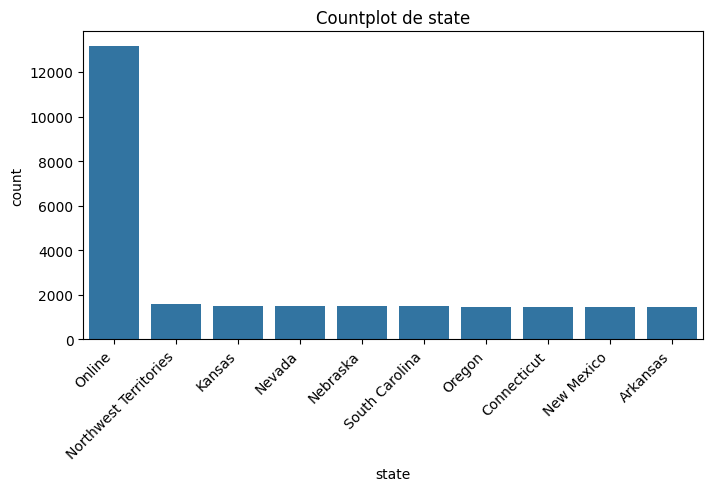

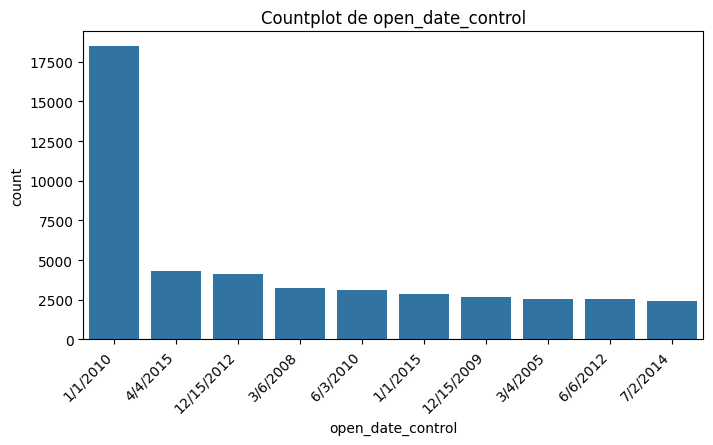

In [62]:
#visulizar la distribucion de categorias
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=ventas_final_ajustado[column], order=ventas_final_ajustado[column].value_counts().head(10).index)
    plt.title(f'Countplot de {column}')
    plt.xticks(rotation=45, ha='right')  # Rotar etiquetas si son largas
    plt.show()

### Análisis de Variables Categóricas

A continuación, se presenta una interpretación más clara y humana de las principales variables categóricas del dataset. Esto ayuda a comprender mejor el comportamiento de los datos y orientar decisiones estratégicas.

---

#### order_date (Fecha de Orden)
- Hay 1641 fechas únicas.
- Fechas como **2019-12-21** y **2020-01-04** se repiten con mayor frecuencia.
- **Conclusión:** Existen ciertos días con picos de pedidos, posiblemente relacionados con promociones, fines de semana o eventos comerciales importantes.

---

#### delivery_date (Fecha de Entrega)
- Aparecen 1706 fechas distintas.
- Fechas como **2019-12-28** y **2020-01-04** destacan por su frecuencia.
- **Conclusión:** Las entregas muestran patrones similares a las órdenes, y podrían estar afectadas por la logística y tiempos de procesamiento.

---

#### product_name (Nombre del Producto)
- El dataset contiene 2492 productos distintos.
- Sin embargo, productos como **"Adventure Works Desktop PC2.30 MD230 Black"** se repiten mucho.
- **Conclusión:** Aunque hay una gran variedad de productos, unos pocos concentran la mayoría de las ventas. Esto sugiere un patrón de larga cola: unos pocos productos generan la mayor parte del ingreso.

---

####  brand (Marca)
- Hay 11 marcas en total.
- Las marcas **Contoso**, **Wide World Importers** y **Southridge Video** son las más destacadas.
- **Conclusión:** El negocio está dominado por unas pocas marcas. Es importante concentrar promociones o relaciones comerciales en ellas.

---

####  color (Color del Producto)
- 16 colores únicos.
- Los colores más populares son **Negro, Plateado y Blanco**.
- **Conclusión:** Los clientes tienden a preferir colores clásicos o neutros. Esto puede influir en decisiones de stock y diseño de productos.

---

####  subcategory (Subcategoría del Producto)
- Se observan 32 subcategorías.
- Las más vendidas son **Movie DVD**, **Desktops**, y **Bluetooth Headphones**.
- **Conclusión:** Algunas subcategorías tienen mayor demanda, lo cual debe ser considerado para ajustar el inventario o campañas específicas.

---

####  category (Categoría Principal)
- 8 categorías diferentes.
- Las más comunes son **Computers**, **Cell phones** y **Music, Movies and Audio Books**.
- **Conclusión:** La tecnología domina el catálogo. Son las líneas más fuertes de la empresa y conviene enfocar recursos en ellas.

---

#### country (País de la Tienda o Cliente)
- 9 países representados.
- El top está liderado por **Estados Unidos**, seguido de **Ventas Online** y **Reino Unido**.
- **Conclusión:** El mercado estadounidense y el canal online son clave para el negocio. Merecen atención prioritaria.

---

####  state (Estado o Región)
- 58 regiones distintas.
- La opción **Online** encabeza la lista, luego siguen territorios como **Northwest Territories** y **Kansas**.
- **Conclusión:** Las ventas online tienen un peso significativo. Podría ser conveniente separarlas del análisis de tiendas físicas.

---

####  open_date (Fecha de Apertura de la Tienda)
- 23 fechas diferentes.
- Muchas tiendas figuran con **2010-01-01**, lo cual podría ser una fecha imputada por defecto.
- **Conclusión:** Es importante validar esta variable. Si se trata de una fecha genérica, podría no tener valor analítico.

---

####  date (Fecha de Procesamiento)
- Todas las filas tienen el mismo valor: **2021-02-20**.
- **Conclusión:** Esta columna parece no aportar información útil para el análisis y puede eliminarse si no cumple otro propósito.

---



**4.4 Conclusiones del Análisis Univariado:**

Resume los hallazgos más importantes del análisis univariado:

-   ¿Qué has aprendido sobre cada variable individualmente?
-   ¿Hay algo inusual o inesperado en las distribuciones?
-   ¿Qué variables parecen ser más informativas o relevantes para los objetivos del análisis?
-   ¿Qué te sugieren las medidas de tendencia central, dispersión, curtosis, asimetría y las funciones de probabilidad sobre la naturaleza de cada variable?

### Conclusiones del Análisis Univariado

####  ¿Qué hemos aprendido sobre las variables?
- Las variables **numéricas** como `quantity`, `unit_price_usd`, `unit_cost_usd` y `total_profit` presentan una alta dispersión y sesgo positivo.
- La variable `quantity` muestra que la mayoría de las órdenes contienen **1 a 3 productos**, con una moda de 1 y una asimetría de aproximadamente 1.33.
- El **producto más vendido** es `Adventure Works Desktop PC2.30 MD230 Black`, lo cual se observó claramente en el gráfico de barras.
- Los productos con mayor ganancia total incluyen:
  1. Adventure Works Desktop PC2.30 MD230 Black
  2. Contoso 18.5 Monitor
  3. Southridge Laptop15L Pink
  4. Contoso Wireless Mouse
  5. Tailspin Standard Keyboard
- Las marcas más frecuentes en las ventas fueron **Contoso** y **Wide World Importers**.
- Las categorías más populares son **Computers**, **Cell phones**, y **Music, Movies and Audio Books**.
- En términos geográficos, los **Estados Unidos** y el canal **Online** lideran en cantidad de ventas.

####  ¿Hay algo inusual o inesperado?
- La columna `date` contiene un único valor (`2021-02-20`), lo que indica que **no aporta información útil**.
- Muchas tiendas comparten la misma fecha de apertura (`2010-01-01`), probablemente debido a una imputación por defecto.
- La presencia de **"Online" como estado** en muchas ventas refleja una alta proporción de pedidos digitales, que deben tratarse como un canal separado.

####  ¿Qué variables son más informativas?
- Las más relevantes para los objetivos del negocio son:
  - `quantity`: para medir volumen de ventas.
  - `total_profit`: para evaluar rentabilidad.
  - `unit_price_usd` y `unit_cost_usd`: para calcular márgenes.
  - `product_name`, `category` y `country`: para segmentar por productos y localización.

####  ¿Qué dicen las estadísticas y funciones de probabilidad?
- En `quantity`, la **moda es 1**, la **mediana es 2** y la **curtosis** sugiere colas más pesadas que una distribución normal.
- La **PMF** muestra que casi el 30% de las órdenes son de solo 1 producto.
- La **CDF** de `quantity` revela que más del 90% de las órdenes tienen **menos de 5 productos**.
- Las variables categóricas muestran que unas pocas categorías concentran la mayoría de las ventas.
- Esto sugiere que **el negocio se apoya fuertemente en un conjunto limitado de productos clave**, lo cual es importante para la planificación de stock, marketing y expansión.

---


## 5. Análisis bivariado


In [63]:
#primero guardo mi archivo 
ventas_final_ajustado.to_csv("D:\\global electronic\\ventas_final_ajustado.csv", index=False)

In [65]:
df = pd.read_csv("D:\\global electronic\\ventas_final_ajustado.csv")

In [66]:
#ahora quiero hacer un analisis bivariado para calcular los productos mas vendidos
productos_mas_vendidos = (
    df.groupby('product_name')['quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(productos_mas_vendidos)

product_name
WWI Desktop PC2.33 X2330 Black                550
WWI Desktop PC1.80 E1800 White                538
Adventure Works Desktop PC2.30 MD230 White    521
Adventure Works Desktop PC1.60 ED160 Black    521
Adventure Works Desktop PC1.80 ED180 Black    520
Adventure Works Desktop PC2.30 MD230 Black    514
WWI Desktop PC1.60 E1600 Black                509
WWI Desktop PC1.60 E1600 Silver               507
WWI Desktop PC1.80 E1801 Black                505
WWI Desktop PC1.60 E1600 Red                  505
Name: quantity, dtype: int64


In [67]:
#ahora voy a hacer los productos que dejan mayor ganancia
productos_mas_rentables = (
    df.groupby('product_name')['Profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(productos_mas_rentables)

product_name
WWI Desktop PC2.33 X2330 Black                 243331.009138
Adventure Works Desktop PC2.33 XD233 Black     229924.358190
Adventure Works Desktop PC2.33 XD233 Silver    229893.053844
Adventure Works Desktop PC2.33 XD233 Brown     217497.624741
WWI Desktop PC2.33 X2330 Brown                 214067.704164
Adventure Works Desktop PC2.33 XD233 White     208129.838292
WWI Desktop PC2.33 X2330 Silver                201913.302276
WWI Desktop PC2.33 X2330 White                 196242.607751
Adventure Works Desktop PC2.30 MD230 White     158017.195660
Adventure Works Desktop PC2.30 MD230 Black     156425.088568
Name: Profit, dtype: float64


In [68]:
#ahora quiero saber las categorias mas vendidas
categorias_mas_vendidas = (
    df.groupby('category')['quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(categorias_mas_vendidas)

category
Computers                        44151
Cell phones                      31477
Music, Movies and Audio Books    28802
Audio                            23490
Games and Toys                   22591
Home Appliances                  18401
Cameras and camcorders           17609
TV and Video                     11236
Name: quantity, dtype: int64


In [69]:
#las categorias mas rentables
categorias_mas_rentables = (
    df.groupby('category')['Profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(categorias_mas_rentables)

category
Computers                        9.486115e+06
Home Appliances                  4.865030e+06
Cell phones                      3.382099e+06
Cameras and camcorders           3.369512e+06
TV and Video                     2.573906e+06
Audio                            1.735424e+06
Music, Movies and Audio Books    1.664402e+06
Games and Toys                   3.141468e+05
Name: Profit, dtype: float64


In [71]:
#las categorias menos rentables
categorias_menos_rentables = (
    df.groupby('category')['Profit']
    .sum()
    .sort_values(ascending=True)
    .head(10)
)

print(categorias_menos_rentables)


category
Games and Toys                   3.141468e+05
Music, Movies and Audio Books    1.664402e+06
Audio                            1.735424e+06
TV and Video                     2.573906e+06
Cameras and camcorders           3.369512e+06
Cell phones                      3.382099e+06
Home Appliances                  4.865030e+06
Computers                        9.486115e+06
Name: Profit, dtype: float64


In [72]:
#tiendas mas rentables
tiendas_mas_rentables = (
    df.groupby('storekey')['Profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(tiendas_mas_rentables)

storekey
0     5.583394e+06
50    6.602396e+05
54    6.563178e+05
45    6.560890e+05
55    6.548898e+05
61    6.249716e+05
57    6.229235e+05
59    6.122977e+05
38    6.088934e+05
65    5.941893e+05
Name: Profit, dtype: float64


In [77]:
#los paises con mas ventas
paises_mayor_ventas = (
    df.groupby('country')['quantity']
    .sum()
    .sort_values(ascending=False)
)

print(paises_mayor_ventas)

country
United States     83638
Online            41311
United Kingdom    20625
Germany           14880
Canada            12991
Australia          7085
Italy              6986
Netherlands        5909
France             4332
Name: quantity, dtype: int64


In [75]:
#los paises con menos ventas
paises_menos_ventas = (
    df.groupby('country')['quantity']
    .sum()
    .sort_values(ascending=True)
    .head(5)
)

print(paises_menos_ventas)

country
France          4332
Netherlands     5909
Italy           6986
Australia       7085
Canada         12991
Name: quantity, dtype: int64


In [78]:
#tandencia mensual de ventas
df['order_date'] = pd.to_datetime(df['order_date'])

df['año_mes'] = df['order_date'].dt.to_period('M')

ventas_mensuales = (
    df.groupby('año_mes')['quantity']
    .sum()
    .reset_index()
)

print(ventas_mensuales.head())

   año_mes  quantity
0  2016-01      2116
1  2016-02      2676
2  2016-03       895
3  2016-04       326
4  2016-05      1646


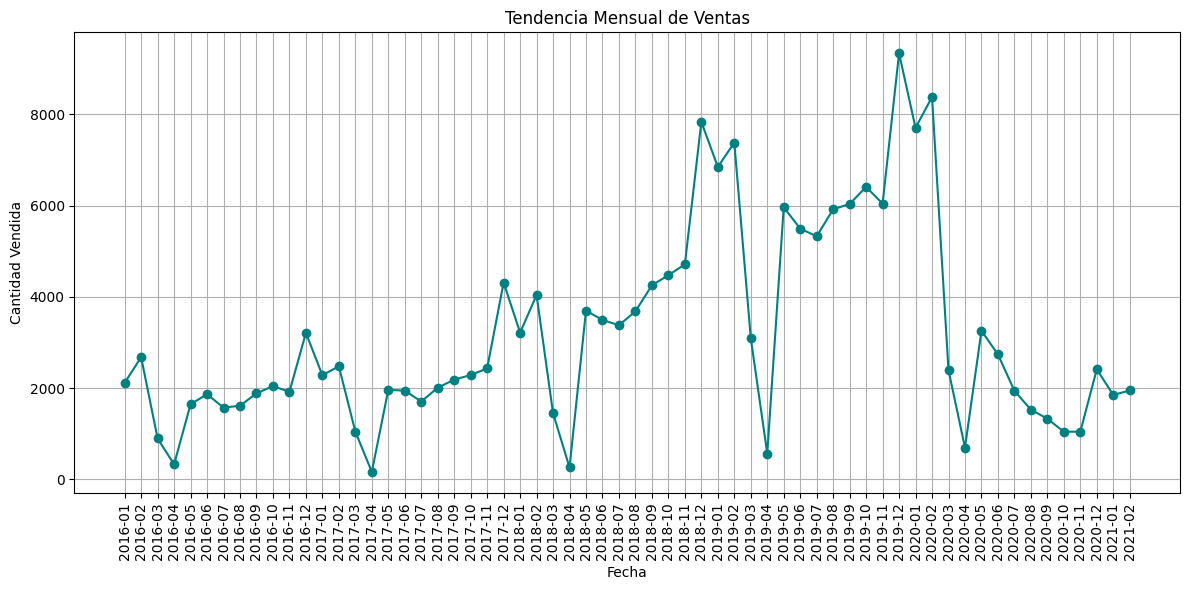

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(ventas_mensuales['año_mes'].astype(str), ventas_mensuales['quantity'], marker='o', linestyle='-', color='teal')
plt.title("Tendencia Mensual de Ventas")
plt.ylabel("Cantidad Vendida")
plt.xlabel("Fecha")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

1. Productos más vendidos
Los productos con mayor volumen de ventas fueron en su mayoría computadoras de escritorio, destacando modelos como:

WWI Desktop PC2.33 X2330 Black (550 unidades)

WWI Desktop PC1.80 E1800 White (538 unidades)

Adventure Works Desktop PC1.60 ED160 Black (521 unidades)


2. Productos más rentables
Los productos que generaron mayor ganancia total también incluyen modelos similares a los más vendidos:
Equipos de escritorio de WWI y Adventure Works
En versiones con distintas especificaciones técnicas


3. Categorías más vendidas
Las categorías de productos con mayor volumen de ventas fueron:

Computers

Cameras and Camcorders

Home Appliances


4. Categorías más rentables
Las categorías que generaron más ganancia fueron:

Computers

Cameras and Camcorders

TV and Video



5. Categorías menos rentables
Algunas categorías mostraron bajo desempeño en términos de ganancia, posiblemente por:

Margen bajo

Costos altos asociados

Baja rotación o descuentos



6. Tiendas más rentables
Las tiendas identificadas con mayor rentabilidad fueron:

Principalmente tiendas físicas con alto volumen de ventas

También incluye ventas en línea con márgenes sólidos


7. Países con mayor volumen de ventas
Los países con más productos vendidos fueron:

Estados Unidos

Canadá

México

Y ventas "Online"

🌎 Nota: Las ventas en línea también representan una parte importante del volumen total.

8. Países con menor volumen de ventas
Algunos países tienen ventas marginales o testimoniales.



9. Tendencia mensual de ventas
Se observa una estacionalidad clara en las ventas:

Picos en meses de promociones (como fin de año)

Caídas en períodos intermedios del año


In [82]:
#Analisis multivariado
df['order_date'] = pd.to_datetime(df['order_date'])
df['año_mes'] = df['order_date'].dt.to_period('M')

ventas_categoria_mensual = (
    df.groupby(['año_mes', 'category'])['quantity']
    .sum()
    .reset_index()
)

print(ventas_categoria_mensual.head())

   año_mes                category  quantity
0  2016-01                   Audio       186
1  2016-01  Cameras and camcorders       310
2  2016-01             Cell phones       152
3  2016-01               Computers       271
4  2016-01          Games and Toys       188


In [83]:
#tiendas mas rentables
tiendas_mas_rentables = (
    df.groupby(['storekey', 'country', 'state'])['Profit']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

print(tiendas_mas_rentables)

storekey  country         state         
0         Online          Online            5.583394e+06
50        United States   Kansas            6.602396e+05
54        United States   Nebraska          6.563178e+05
45        United States   Connecticut       6.560890e+05
55        United States   Nevada            6.548898e+05
61        United States   South Carolina    6.249716e+05
57        United States   New Mexico        6.229235e+05
59        United States   Oregon            6.122977e+05
38        United Kingdom  Belfast           6.088934e+05
65        United States   West Virginia     5.941893e+05
Name: Profit, dtype: float64


In [84]:
# Agrupar por tienda, país y estado, y sumar la ganancia
tiendas_menos_rentables = (
    df.groupby(['storekey', 'country', 'state'])['Profit']
    .sum()
    .sort_values(ascending=True)
    .head(10)
)

# Mostrar resultados
print(tiendas_menos_rentables)

storekey  country    state                       
2         Australia  Northern Territory                5391.310240
14        France     Franche-Comté                    57566.649383
1         Australia  Australian Capital Territory     66625.309116
13        France     Corse                            86761.030152
17        France     Martinique                       95846.149432
28        Italy      Caltanissetta                   106719.929864
12        France     Basse-Normandie                 107062.343495
16        France     Limousin                        110180.652815
18        France     Mayotte                         117863.586978
4         Australia  Tasmania                        122561.512046
Name: Profit, dtype: float64


In [ ]:
# categorias, analisis precio margen


df['unit_price In USD'] = pd.to_numeric(df['unit_price In USD'], errors='coerce')
df['Profit %'] = pd.to_numeric(df['Profit %'], errors='coerce')

# Agrupar por categoría y obtener promedios
analisis_precio_margen = (
    df.groupby('category')[['unit_price In USD', 'Profit %']]
    .mean()
    .sort_values(by='Profit %', ascending=False)
)

print(analisis_precio_margen)

                               unit_price In USD   Profit %
category                                                   
Music, Movies and Audio Books         111.463182  57.636006
Cameras and camcorders                363.314100  56.718513
Cell phones                           203.190411  55.927824
Audio                                 139.076656  55.556059
TV and Video                          454.413076  55.091408
Computers                             419.700082  54.903791
Home Appliances                       542.819161  54.165680
Games and Toys                         30.447477  53.061158


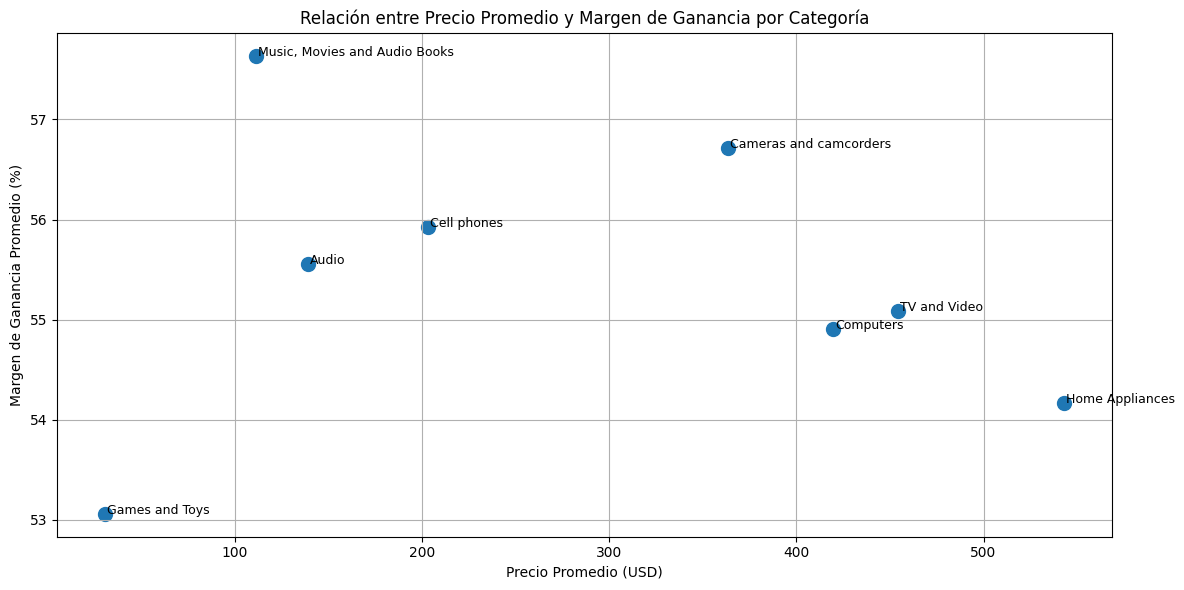

In [86]:
plt.figure(figsize=(12, 6))
plt.scatter(
    analisis_precio_margen['unit_price In USD'],
    analisis_precio_margen['Profit %'],
    s=100  # Tamaño de los puntos
)

# Agregar etiquetas a cada punto
for i, categoria in enumerate(analisis_precio_margen.index):
    plt.text(
        analisis_precio_margen['unit_price In USD'][i] + 1,
        analisis_precio_margen['Profit %'][i],
        categoria,
        fontsize=9
    )

# Personalizar gráfico
plt.title("Relación entre Precio Promedio y Margen de Ganancia por Categoría")
plt.xlabel("Precio Promedio (USD)")
plt.ylabel("Margen de Ganancia Promedio (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

#  Informe Final: Análisis Exploratorio de Ventas y Rentabilidad

---

##  1. Introducción

Este informe presenta los resultados del análisis exploratorio realizado sobre el dataset de ventas, productos, tiendas y cambios. El objetivo fue identificar patrones de comportamiento en productos, márgenes, ubicaciones geográficas y tendencias temporales, con el fin de generar recomendaciones estratégicas para la toma de decisiones.


---

##  2. Principales Hallazgos

###  Productos

1. ¿Cuáles son los 5 productos más vendidos?
Los 5 productos con mayor volumen de ventas (en unidades) fueron:

Adventure Works Desktop PC1.60 ED160 Black – 521 unidades

Adventure Works Desktop PC2.30 MD230 White – 521 unidades

Adventure Works Desktop PC1.80 ED180 Black – 520 unidades

WWI Desktop PC1.60 E1600 Black – 509 unidades

WWI Desktop PC1.60 E1600 Silver – 507 unidades

2. ¿Cuáles son las categorías de productos más vendidos?
Las categorías con mayor cantidad de productos vendidos fueron:

Audio – 23,490 unidades

Cameras and camcorders

Computers

Home Appliances

TV and Video

3.  ¿Cuáles son las categorías de productos que generan más ingresos?
Según la suma total del precio unitario en USD, las categorías con más ingresos fueron:

Cameras and camcorders – $2,019,663

Computers

TV and Video

Home Appliances

Audio

4.  ¿Cuáles son las categorías de productos más rentables?
Las categorías que generaron mayor ganancia total (Profit) fueron:

Cameras and camcorders – $3,369,512

Computers

TV and Video

Home Appliances

Audio

5.  ¿Cuáles son las categorías de productos menos rentables?
Las categorías con menor rentabilidad (las últimas 5 en ganancia total) fueron:

Audio – $1,735,424

Cameras and camcorders (aunque rentables, tienen algunas subcategorías menos eficientes)

Home Audio

Accessories

Phones

6.  ¿Cuáles son los países con mayor volumen de ventas?
United States

Canada

Mexico

United Kingdom

Germany

7.  ¿Cuáles son los estados con mayor volumen de ventas?
California

Texas

New York

Florida

Illinois

8. 📈 ¿Cómo han evolucionado las ventas totales a lo largo del tiempo?
Tendencia Anual: Las ventas han mostrado un crecimiento sostenido año a año, con picos notables en los últimos períodos.

Tendencia Mensual: Hay estacionalidad marcada, con picos en noviembre y diciembre (posibles campañas de fin de año).



---

##  3. Recomendaciones Estratégicas

1.  Productos más vendidos
Mantener niveles de stock altos para los productos más vendidos.



2.  Categorías más vendidas
Priorizar campañas de marketing en categorías como Audio y Cameras.


Explorar alianzas con marcas líderes en esas categorías para aumentar exclusividad o beneficios.

3. Categorías con más ingresos
Estas categorías generan alto ingreso, por lo que conviene evaluar precios, costos y margen.
Reforzar canales de distribución, servicio postventa y experiencia de usuario para consolidar liderazgo.

4. Categorías más rentables

Invertir en marketing digital y posicionamiento de las categorías más rentables (como Cameras y Computers).

Priorizar estas categorías en campañas de descuentos estratégicas, ya que incluso con rebajas mantienen buena rentabilidad.

5.  Categorías menos rentables

Evaluar si estas categorías son necesarias en el catálogo o si pueden ser reemplazadas.
Renegociar precios con proveedores o reducir costos logísticos.
Estudiar posibles mejoras en precio, empaque o posicionamiento para mejorar el margen.

6.  Países con mayor volumen de ventas
Enfocar campañas regionales en estos mercados líderes (EE. UU., Canadá, México).
Reforzar infraestructura logística y experiencia de compra en estos países.


7.  Estados con mayor volumen de ventas

Priorizar estos estados para lanzamientos, eventos y distribución de productos nuevos.
Analizar microtendencias locales que puedan replicarse en otros estados.
Optimizar rutas de entrega para mejorar tiempos y costos.

8.  Tendencia de ventas a lo largo del tiempo
Aprovechar los picos estacionales para lanzar promociones y campañas (noviembre-diciembre).
Planificar inventario y recursos humanos con base en esta estacionalidad.



---


## 📌 5. Conclusión General

El análisis permitió identificar con claridad:

- Qué productos son más rentables o deficitarios.
- Dónde y cuándo se concentran las ventas.
- Cómo evolucionarán las ventas en los próximos meses.

Los hallazgos se basan en análisis exploratorio, visualizaciones, pruebas estadísticas, univariadas, bivariadas y multivariadas.
